In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("/fast/AG_Haghverdi/Ehsan_Karimiara/subarna_left/data_to_transfer/data_Focal/Final_Focal_Tcell_Selected_Patients_All_Cells.csv")

In [3]:
df1

FSC-A         SSC-A  FJComp-APC-A_CCR7  FJComp-APC-H7-A_CD3  \
0         93453.453125  36038.527344        2222.149170         13610.945312   
1         93888.437500  42202.226562        1249.560791         14517.682617   
2         83406.460938  29809.189453        5415.442871         15173.890625   
3         88588.570312  30945.574219        2496.401123         23339.359375   
4         96899.492188  34309.492188         721.191895         23898.207031   
...                ...           ...                ...                  ...   
1042614   67253.257812  26187.955078         296.318542          7778.358398   
1042615   85305.195312  60011.152344         292.137177          3944.483643   
1042616   88650.359375  31850.660156         231.328842         23916.244141   
1042617   84076.195312  26921.001953         121.677155         12153.617188   
1042618  112096.734375  44752.257812        -416.369110         28775.716797   

         FJComp-APC-R700-A_C127  FJComp-BB515-A_CD45RA  FJComp-BB700-A_CD69  \
0                   9971.123047             329.709106           656.990295   
1                   4386.832031             355.582886            31.495504   
2                   1861.900024           10071.045898           752.526489   
3                   4030.983643           24051.947266           -32.248840   
4                   2750.592285             372.630249           247.886719   
...                         ...                    ...                  ...   
1042614             -521.421570             249.526398           470.002411   
1042615              -22.786474            8002.434082          3015.900146   
1042616            -1244.323486             656.097900           -93.671532   
1042617              -31.772200             166.948074           533.377075   
1042618             -799.400574           15680.216797           850.385681   

         FJComp-BUV396-A_CD4  FJComp-BUV496-A_CD8  FJComp-BUV563-A_lineage  \
0               15623.502930          2580.348877               524.287415   
1               18365.929688          1786.728271               490.127899   
2               12834.625000          -480.556488               149.582291   
3               12297.297852           439.953735               144.644897   
4               14306.492188          2341.967773               689.492615   
...                      ...                  ...                      ...   
1042614            13.167521          1475.588135               629.752625   
1042615           222.736832          2765.151855               971.513672   
1042616           432.168060           562.326904               340.338470   
1042617           235.728821          1367.515381               397.193115   
1042618          1234.852295           274.440491              1562.020386   

         ...  FJComp-BV786-A_CD95_asinh_aligned  \
0        ...                           3.143777   
1        ...                           3.695279   
2        ...                           2.342666   
3        ...                           2.059916   
4        ...                           3.534585   
...      ...                                ...   
1042614  ...                           2.218143   
1042615  ...                           2.905413   
1042616  ...                           2.670433   
1042617  ...                           2.376860   
1042618  ...                           3.822279   

         FJComp-BYG584-A_CD39_asinh_aligned  \
0                                 -0.002036   
1                                  0.029185   
2                                 -0.011751   
3                                  0.273379   
4                                 -0.548784   
...                                     ...   
1042614                            1.614680   
1042615                            2.062579   
1042616                            1.688272   
1042617                            0.975315   
1042618                            3.857

In [4]:
df_new = df1[['FJComp-APC-A_CCR7_asinh_aligned','FJComp-APC-H7-A_CD3_asinh_aligned','FJComp-APC-R700-A_C127_asinh_aligned',
              'FJComp-BB515-A_CD45RA_asinh_aligned','FJComp-BB700-A_CD69_asinh_aligned','FJComp-BUV396-A_CD4_asinh_aligned',
              'FJComp-BUV496-A_CD8_asinh_aligned', 'FJComp-BUV563-A_lineage_asinh_aligned','FJComp-BUV615-A_CD314_asinh_aligned',
              'FJComp-BUV661-A_CXCR3_asinh_aligned','FJComp-BUV737-A_CD38_asinh_aligned', 'FJComp-BUV805-A_CD45RO_asinh_aligned',
              'FJComp-BV421-A_CD28_asinh_aligned','FJComp-BV510-A_efluor506_asinh_aligned', 'FJComp-BV605-A_CD103_asinh_aligned',
              'FJComp-BV650-A_PD1_asinh_aligned', 'FJComp-BV711-A_CD94_asinh_aligned', 'FJComp-BV750-A_TCRab_asinh_aligned',
              'FJComp-BV786-A_CD95_asinh_aligned','FJComp-BYG584-A_CD39_asinh_aligned', 'FJComp-BYG670-A_ITBG7_asinh_aligned',
              'FJComp-BYG790-A_TCRgd_asinh_aligned', 'FJComp-PE-CF594-A_CD25_asinh_aligned', 'Refined_clustering']]

In [5]:
del df1
df_new.shape

(1042619, 24)

In [6]:
import scanpy as sc
sc.set_figure_params(figsize=(8,8), fontsize=15, )
import random
import numpy as np
from numpy import linalg as LA
    
def create_adata(df, obs_features=["Refined_clustering"]):
    n_obs = df.shape[0]
    obs = pd.DataFrame()
    obs[obs_features] = df[obs_features]
    obs = obs.astype('category')
    var_names = df.drop(columns=obs_features).columns.values
    n_vars = len(var_names)
    var = pd.DataFrame(index=var_names)
    X = df.drop(columns=obs_features).values
    adata = sc.AnnData(X, obs=obs, var=var)
    
    return adata

In [7]:

def sample_random(adata, s_size=1000, seed = 12345):
    np.random.seed(seed)
    rand_index1 = np.random.choice(adata.obs.index, s_size, replace=False)
    
    return rand_index1


def sample_diagonal(adata, s_size=1000, seed=12345):

    np.random.seed(seed)

    x = adata.X
    prob = LA.norm(x, axis=1)
    s = sum(prob)
    prob = [float(i)/s for i in prob]
    rand_index2 = np.random.choice(adata.obs.index, s_size, p=prob, replace=False)
    
    return rand_index2

def bin_sample(adata, s_size=20, n_bins=10, seed=12345):
    np.random.seed(seed)
    total_indices = np.array([])
    for gene in adata.var_names.values:
        indices = np.array([])
        mini = adata[:, [gene]]
        std = np.std(np.array(mini.X))
        mean = np.mean(np.array(mini.X))
        
        measures = [-np.inf]
        var= (n_bins-2)/2
        for i in range(n_bins-1):
            measures.append(mean-var*std)
            var-=1
        measures.append(np.inf)
              
        for item in range(len(measures)-1):
            measure1, measure2 = measures[item], measures[item+1]
            local_indices = adata[np.array(mini.X > measure1) & np.array(mini.X < measure2)].obs.index.to_numpy()
            if len(local_indices) > s_size:
                indices = np.append(indices, np.random.choice(local_indices, s_size, replace=False))
                # if item==0 or item==len(measures)-2:
                #     indices = np.append(indices,local_indices)
                # else:
                #     indices = np.append(indices, np.random.choice(local_indices, s_size, replace=False))
            elif len(local_indices) > 0:
                indices = np.append(indices,local_indices)
            
        total_indices = np.append(total_indices,indices)
        
    return np.unique(total_indices), total_indices

def bin_sampleـpercentile(adata, total_size=100, n_bins=10, seed=12345):

    np.random.seed(seed)
    total_indices = np.array([])
    for gene in adata.var_names.values:
        indices = np.array([])
        mini = adata[:, [gene]]
        percent = 100/n_bins

        min_v = mini.copy().X.min()
        max_v = mini.copy().X.max()
        measures = [np.percentile(mini.X,0)]

        for i in range(n_bins):
            measures.append(np.percentile(mini.X,(i+1)*percent)) 

        lenghts = [measures[i+1] - measures[i] for i in range(len(measures)-1)]

        prob = lenghts / sum(lenghts)
        prob *= total_size
        prob = [int(x) for x in prob]

        for item in range(len(measures)-1):
            measure1, measure2 = measures[item], measures[item+1]
            local_indices = adata[np.array(mini.X > measure1) & np.array(mini.X < measure2)].obs.index.to_numpy()
            if len(local_indices) < prob[item]:
                prob[item] = len(local_indices)
            indices = np.append(indices, np.random.choice(local_indices, prob[item], replace=False))

        total_indices = np.append(total_indices,indices)
        
    return np.unique(total_indices), total_indices

def bin_sampleـpercentile_power(adata, total_size=100, power=0.75,  n_bins=10, seed=12345):

    np.random.seed(seed)
    total_indices = np.array([])
    for gene in adata.var_names.values:
        indices = np.array([])
        mini = adata[:, [gene]]
        percent = 100/n_bins

        min_v = mini.copy().X.min()
        max_v = mini.copy().X.max()
        measures = [np.percentile(mini.X,0)]

        for i in range(n_bins):
            measures.append(np.percentile(mini.X,(i+1)*percent)) 

        lenghts = [measures[i+1] - measures[i] for i in range(len(measures)-1)]

        lenghts = np.power(lenghts, power)
        prob = lenghts / sum(lenghts)
        prob *= total_size
        prob = [int(x) for x in prob]

        for item in range(len(measures)-1):
            measure1, measure2 = measures[item], measures[item+1]
            local_indices = adata[np.array(mini.X > measure1) & np.array(mini.X < measure2)].obs.index.to_numpy()
            if len(local_indices) < prob[item]:
                prob[item] = len(local_indices)
            indices = np.append(indices, np.random.choice(local_indices, prob[item], replace=False))
                
            # if len(local_indices) > s_size:
            #     indices = np.append(indices, np.random.choice(local_indices, prob[item], replace=False))
            # elif len(local_indices) > 0:
            #     indices = np.append(indices,local_indices)

        total_indices = np.append(total_indices,indices)
        
    return np.unique(total_indices), total_indices

In [8]:
def proportional_sampling(adata, total_size=100, n_bins=10, power=1.0, seed=12345):
    np.random.seed(seed)
    total_indices = np.array([])
    for gene in adata.var_names.values:
        indices = np.array([])
        mini = adata[:, [gene]]
        std = np.std(np.array(mini.X))
        mean = np.mean(np.array(mini.X))

        measures = [-np.inf]
        var= (n_bins-2)/2
        for i in range(n_bins-1):
            measures.append(mean-var*std)
            var-=1
        measures.append(np.inf)

        cell_counts = []
        for item in range(len(measures)-1):
            measure1, measure2 = measures[item], measures[item+1]
            local_indices = adata[np.array(mini.X > measure1) & np.array(mini.X < measure2)].obs.index.to_numpy()
            cell_counts.append(len(local_indices))

        cell_counts = np.power(cell_counts, power)
        prob = cell_counts / sum(cell_counts)
        prob *= total_size
        prob = [int(x) for x in prob]

        for item in range(len(measures)-1):
            measure1, measure2 = measures[item], measures[item+1]
            local_indices = adata[np.array(mini.X > measure1) & np.array(mini.X < measure2)].obs.index.to_numpy()
            if len(local_indices) < prob[item]:
                prob[item] = len(local_indices)
            indices = np.append(indices, np.random.choice(local_indices, prob[item], replace=False))

        total_indices = np.append(total_indices,indices)

    return np.unique(total_indices), total_indices

In [ ]:
def proportional_sampling(adata, total_size=100, n_bins=10, power=1.0, seed=12345):
    np.random.seed(seed)
    total_indices = np.array([])
    for gene in adata.var_names.values:
        indices = np.array([])
        mini = adata[:, [gene]]
        std = np.std(np.array(mini.X))
        mean = np.mean(np.array(mini.X))

        measures = [-np.inf]
        var= (n_bins-2)/2
        for i in range(n_bins-1):
            measures.append(mean-var*std)
            var-=1
        measures.append(np.inf)

        cell_counts = []
        for item in range(len(measures)-1):
            measure1, measure2 = measures[item], measures[item+1]
            local_indices = adata[np.array(mini.X > measure1) & np.array(mini.X < measure2)].obs.index.to_numpy()
            cell_counts.append(len(local_indices))

        cell_counts = np.power(cell_counts, power)
        prob = cell_counts / sum(cell_counts)
        prob *= total_size
        prob = [int(x) for x in prob]

        for item in range(len(measures)-1):
            measure1, measure2 = measures[item], measures[item+1]
            local_indices = adata[np.array(mini.X > measure1) & np.array(mini.X < measure2)].obs.index.to_numpy()
            if len(local_indices) < prob[item]:
                prob[item] = len(local_indices)
            indices = np.append(indices, np.random.choice(local_indices, prob[item], replace=False))

        total_indices = np.append(total_indices,indices)

    return np.unique(total_indices), total_indices

In [9]:
df_new  = df_new.replace(regex=[' T cells', 'memory', 'tissue-resident'],value=['', 'mem', 'tissue-res'])
# m1 = m1.replace(regex=['memory'],value='mem')
# m1 = m1.replace(regex=['resident'],value='res')

In [10]:
df_new['Refined_clustering'].value_counts()

CD4+ naive             386545
CD4+ mem               177636
CD8+ effector          101857
CD8+ naive              73362
CD8+ central mem        57283
CD8+ effector mem       51062
ITGB7+ CD4+             40979
CD4+ PD1+               35367
CD4+ Treg cells         33301
CD4+ cytotoxic          30132
CD8+ tissue-res mem     10807
CD8+ CD39+ PD1+         10346
CD8+ CD38- gd            8968
CD45RA- IL7R+ gd         7972
CD8+ mem stem            7554
CD8- CD38- gd            3745
CD4+ CD103+              3404
CD8- CD38+ gd            1040
CD45RA+ IL7R+ gd          744
CD8+ CD38+ gd             515
Name: Refined_clustering, dtype: int64

In [11]:
adata = create_adata(df_new, obs_features=['Refined_clustering'])
partially_s, tot = bin_sample(adata, n_bins=10, s_size=10)



print(partially_s.size)
random_s = sample_random(adata, s_size=partially_s.size, seed=654342)
ref_s = sample_random(adata, s_size=20000, seed= 2352352)

/home/ekarimi/miniconda3/envs/modi/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


2085


In [12]:
# count, unique = np.unique(tot, return_counts=True)
# dict(zip(count, unique))

/home/ekarimi/miniconda3/envs/modi/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Refined_clustering' as categorical


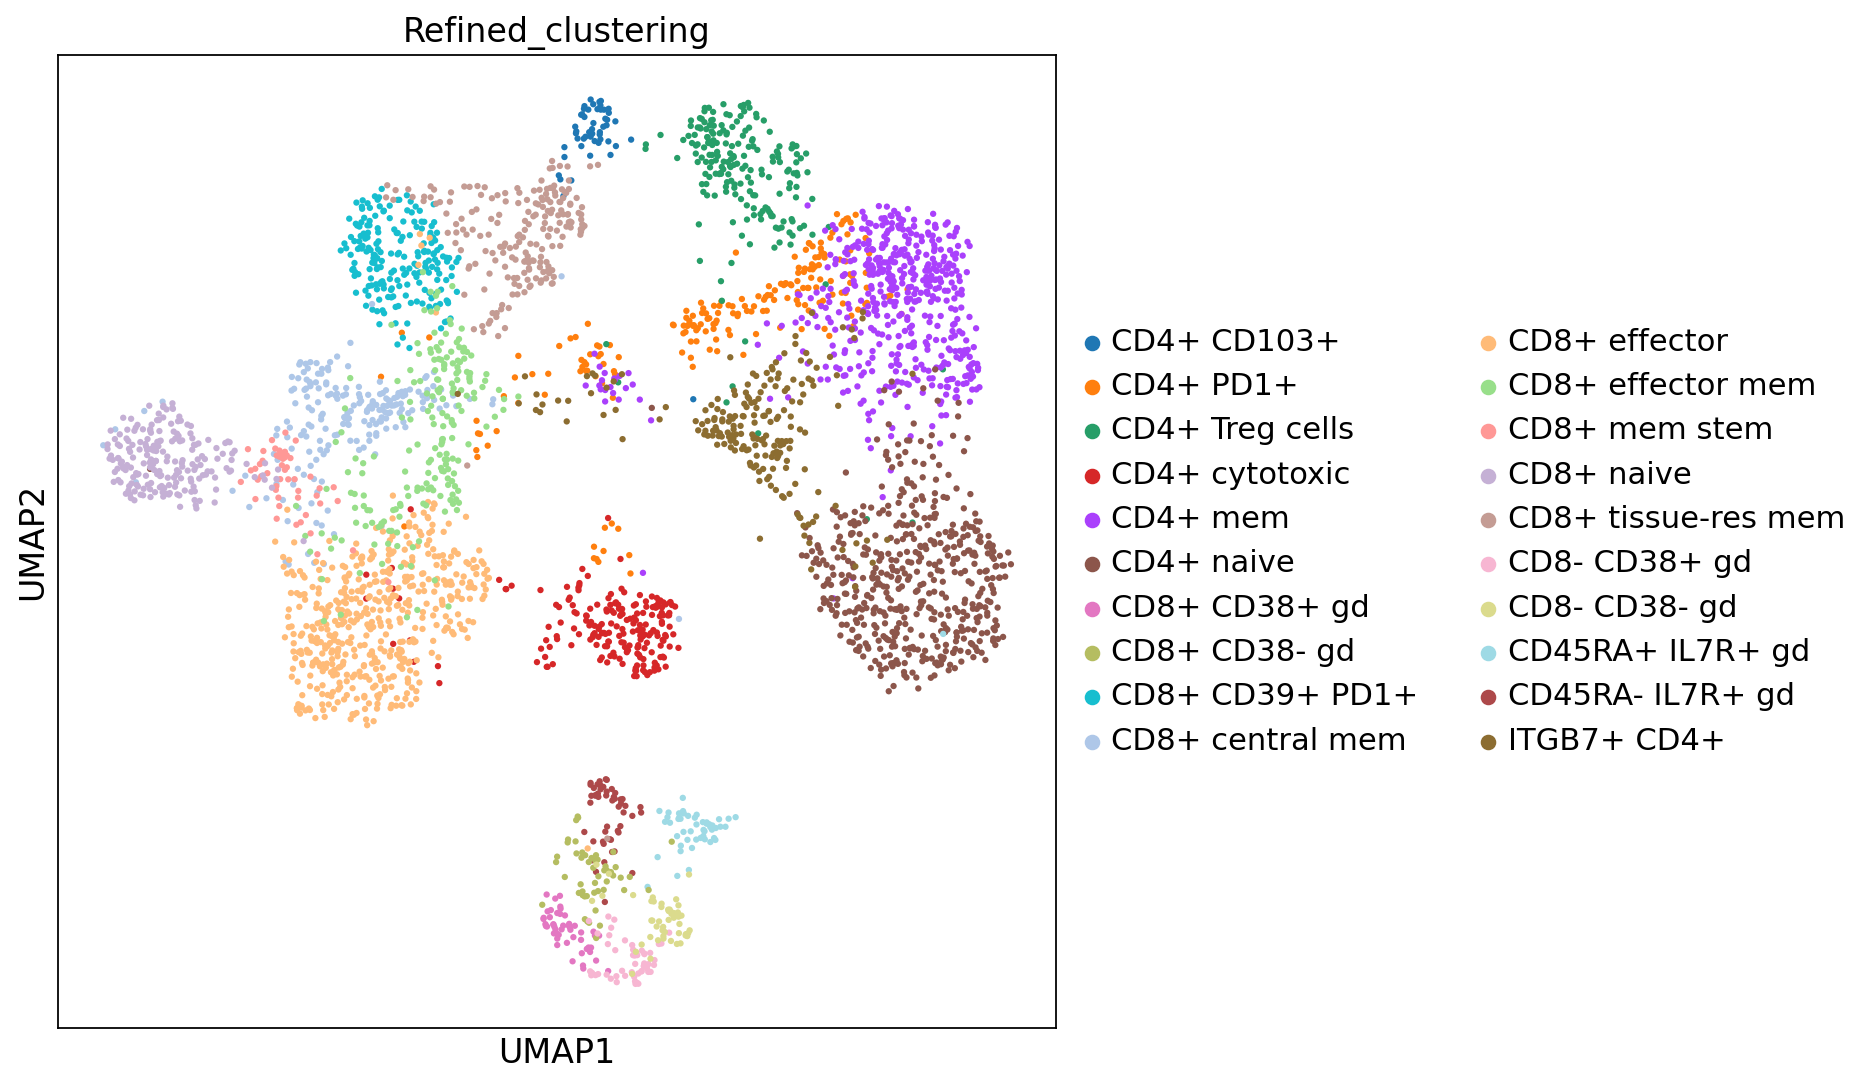

In [13]:
## stratified subsampeled

cluster_key = 'Refined_clustering'
target_cells = 30

adatas = [adata[adata.obs[cluster_key].isin([clust])] for clust in adata.obs[cluster_key].cat.categories]

for dat in adatas:
    if dat.n_obs > 100000:
         sc.pp.subsample(dat, n_obs=500)
    elif dat.n_obs > 10000:
         sc.pp.subsample(dat, n_obs=200)
    else:
         sc.pp.subsample(dat, n_obs=50)
            
adata_downsampled = adatas[0].concatenate(*adatas[1:])

sc.pp.neighbors(adata_downsampled, n_neighbors = 30)
sc.tl.umap(adata_downsampled)
sc.pl.umap(adata_downsampled, color='Refined_clustering')

In [14]:
down_cat = adata_downsampled.obs['Refined_clustering'].cat.categories
down_colors = adata_downsampled.uns['Refined_clustering_colors']
dictionary = dict(zip(down_cat, down_colors))

In [15]:
def plot_umap(ref_adata, dictionary):
    sc.pp.neighbors(ref_adata, n_neighbors = 30)
    sc.tl.umap(ref_adata)
    ref_cat = ref_adata.obs['Refined_clustering'].cat.categories
    dic = [dictionary[key] for key in ref_cat]
    ref_adata.uns['Refined_clustering_colors'] = dic
    sc.pl.umap(ref_adata, color='Refined_clustering')

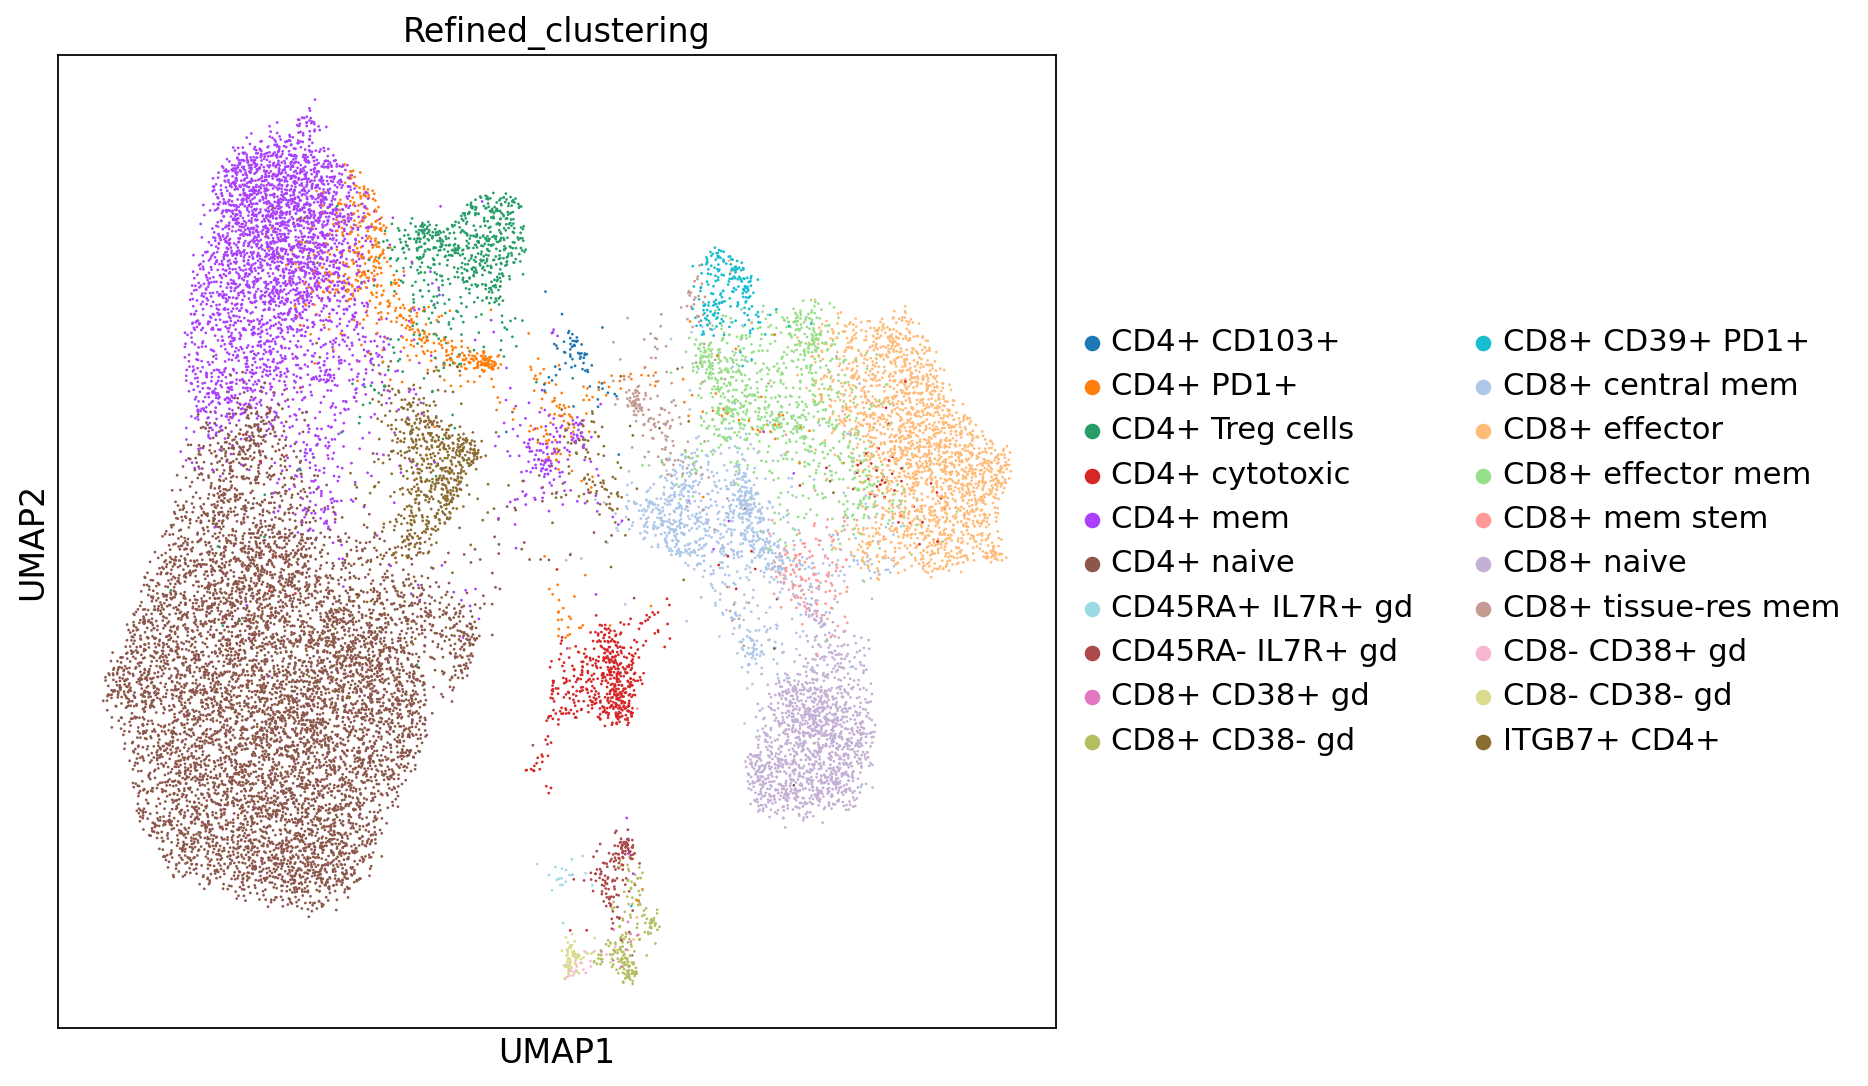

In [16]:
ref_adata = adata[ref_s]
plot_umap(ref_adata, dictionary)

In [17]:
# random_adata = adata[random_s]
# plot_umap(random_adata, dictionary)

In [18]:
# partially_adata = adata[partially_s]
# plot_umap(partially_adata, dictionary)

In [19]:
# bin_perc_s, tot = bin_sampleـpercentile(adata, n_bins=10, total_size=100)
# bin_perc_adata = adata[bin_perc_s]
# plot_umap(bin_perc_adata, dictionary)

In [20]:
# bin_perc_pow_s, tot = bin_sampleـpercentile_power(adata, n_bins=10, total_size=100, power= 2)
# bin_perc_pow_adata = adata[bin_perc_pow_s]
# plot_umap(bin_perc_pow_adata, dictionary)

In [21]:
# prop_s, tot = proportional_sampling(adata, n_bins=10, total_size=100, power= 0.01, seed= 12345)
# prop_adata = adata[prop_s]
# plot_umap(prop_adata, dictionary)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CD8+ CD39+ PD1+ T cells'),
  Text(1, 0, 'CD4+ memory T cells'),
  Text(2, 0, 'CD8+ tissue-resident memory T cells'),
  Text(3, 0, 'CD8+ effector memory T cells'),
  Text(4, 0, 'CD8+ memory stem T cells'),
  Text(5, 0, 'CD4+ naive T cells'),
  Text(6, 0, 'CD8+ naive T cells'),
  Text(7, 0, 'ITGB7+ CD4+ T cells'),
  Text(8, 0, 'CD45RA- IL7R+ gd T cells'),
  Text(9, 0, 'CD8+ CD38- gd T cells'),
  Text(10, 0, 'CD45RA+ IL7R+ gd T cells'),
  Text(11, 0, 'CD8- CD38- gd T cells'),
  Text(12, 0, 'CD8- CD38+ gd T cells'),
  Text(13, 0, 'CD4+ Treg cells'),
  Text(14, 0, 'CD4+ cytotoxic T cells'),
  Text(15, 0, 'CD4+ CD103+ T cells'),
  Text(16, 0, 'CD4+ PD1+ T cells'),
  Text(17, 0, 'CD8+ central memory T cells'),
  Text(18, 0, 'CD8+ effector T cells'),
  Text(19, 0, 'CD8+ CD38+ gd T cells')])

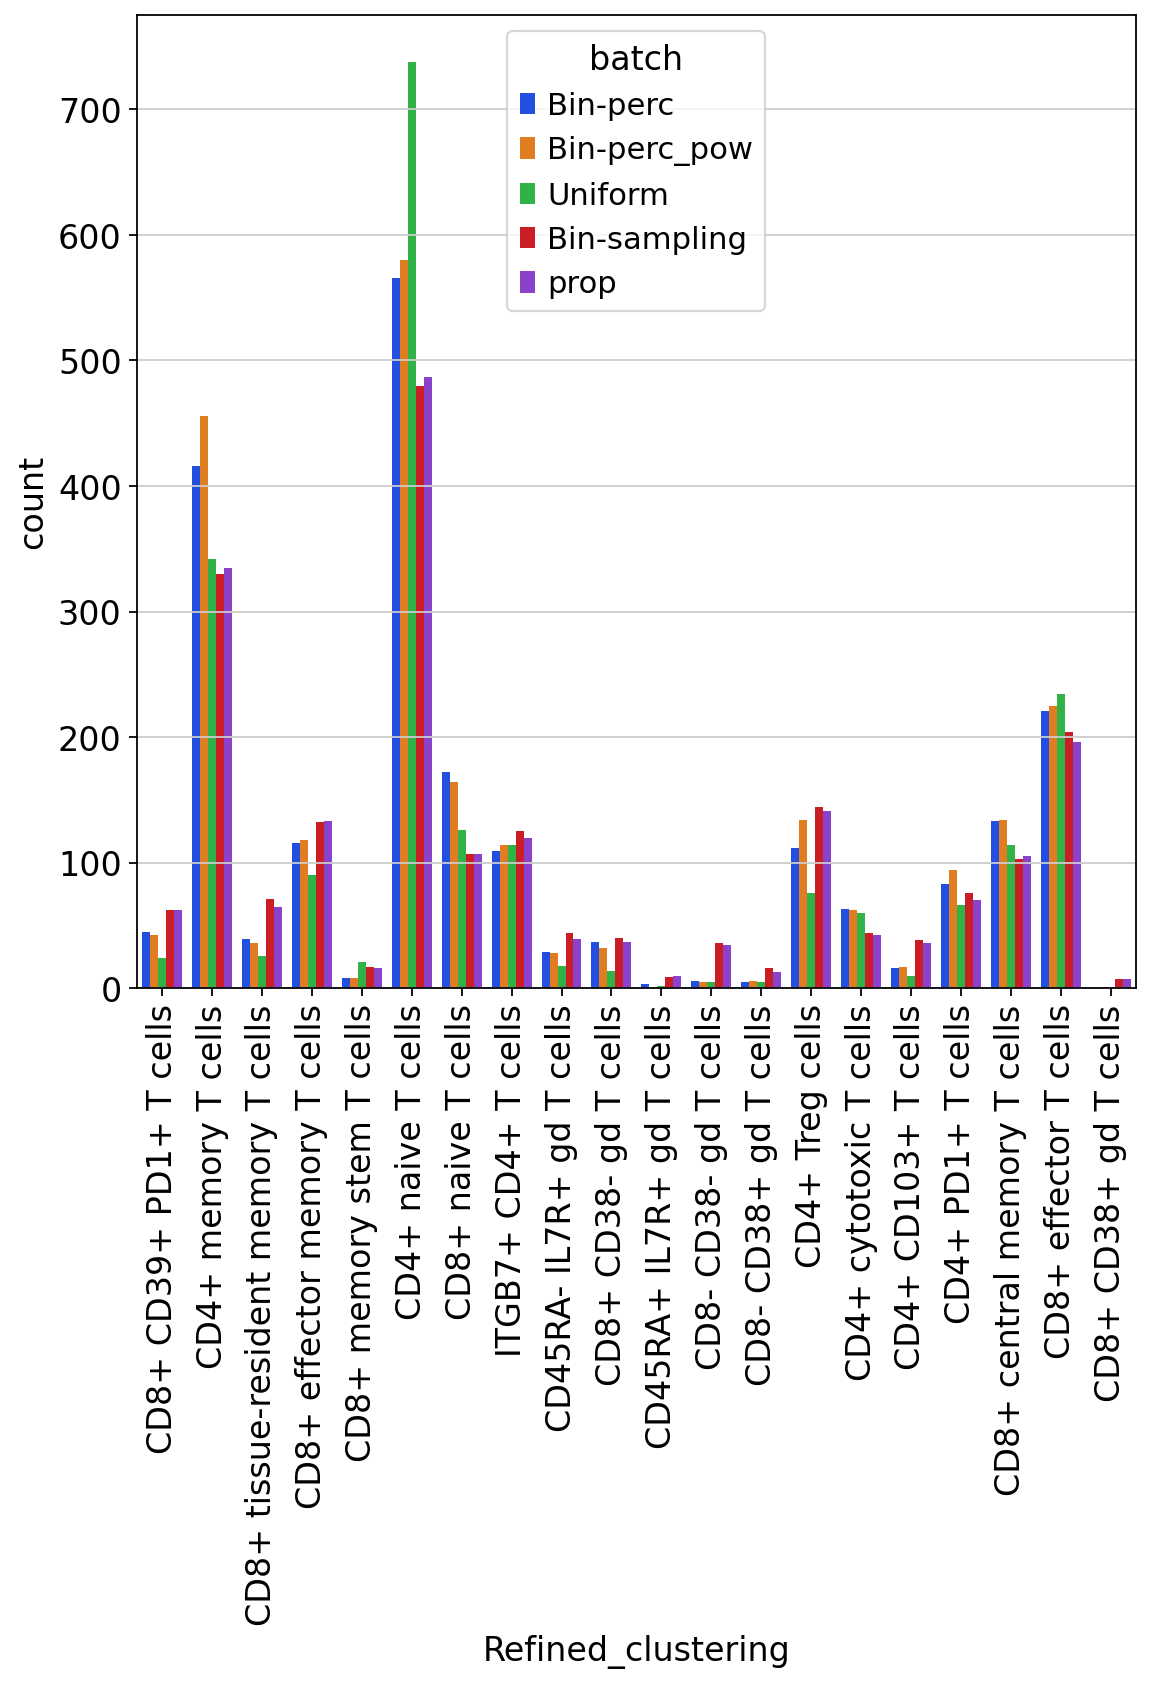

In [38]:
import seaborn as sns
# ref_adata.obs['batch'] = 'ref-uni'
random_adata.obs['batch'] = 'Uniform'
partially_adata.obs['batch'] = 'Bin-sampling'
bin_perc_adata.obs['batch'] = 'Bin-perc'
bin_perc_pow_adata.obs['batch'] = 'Bin-perc_pow'
prop_adata.obs['batch'] = 'prop'





df_mixed = pd.concat([bin_perc_adata.obs, bin_perc_pow_adata.obs, random_adata.obs, partially_adata.obs, prop_adata.obs])
g2 = sns.countplot(data=df_mixed, x="Refined_clustering", hue="batch", palette="bright")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CD4+ memory T cells'),
  Text(1, 0, 'CD8+ tissue-resident memory T cells'),
  Text(2, 0, 'CD8+ CD39+ PD1+ T cells'),
  Text(3, 0, 'CD8+ effector memory T cells'),
  Text(4, 0, 'CD8+ effector T cells'),
  Text(5, 0, 'CD8+ memory stem T cells'),
  Text(6, 0, 'CD8+ naive T cells'),
  Text(7, 0, 'ITGB7+ CD4+ T cells'),
  Text(8, 0, 'CD45RA- IL7R+ gd T cells'),
  Text(9, 0, 'CD8+ CD38- gd T cells'),
  Text(10, 0, 'CD45RA+ IL7R+ gd T cells'),
  Text(11, 0, 'CD4+ naive T cells'),
  Text(12, 0, 'CD4+ Treg cells'),
  Text(13, 0, 'CD8- CD38+ gd T cells'),
  Text(14, 0, 'CD8- CD38- gd T cells'),
  Text(15, 0, 'CD8+ CD38+ gd T cells'),
  Text(16, 0, 'CD4+ PD1+ T cells'),
  Text(17, 0, 'CD4+ cytotoxic T cells'),
  Text(18, 0, 'CD4+ CD103+ T cells'),
  Text(19, 0, 'CD8+ central memory T cells')])

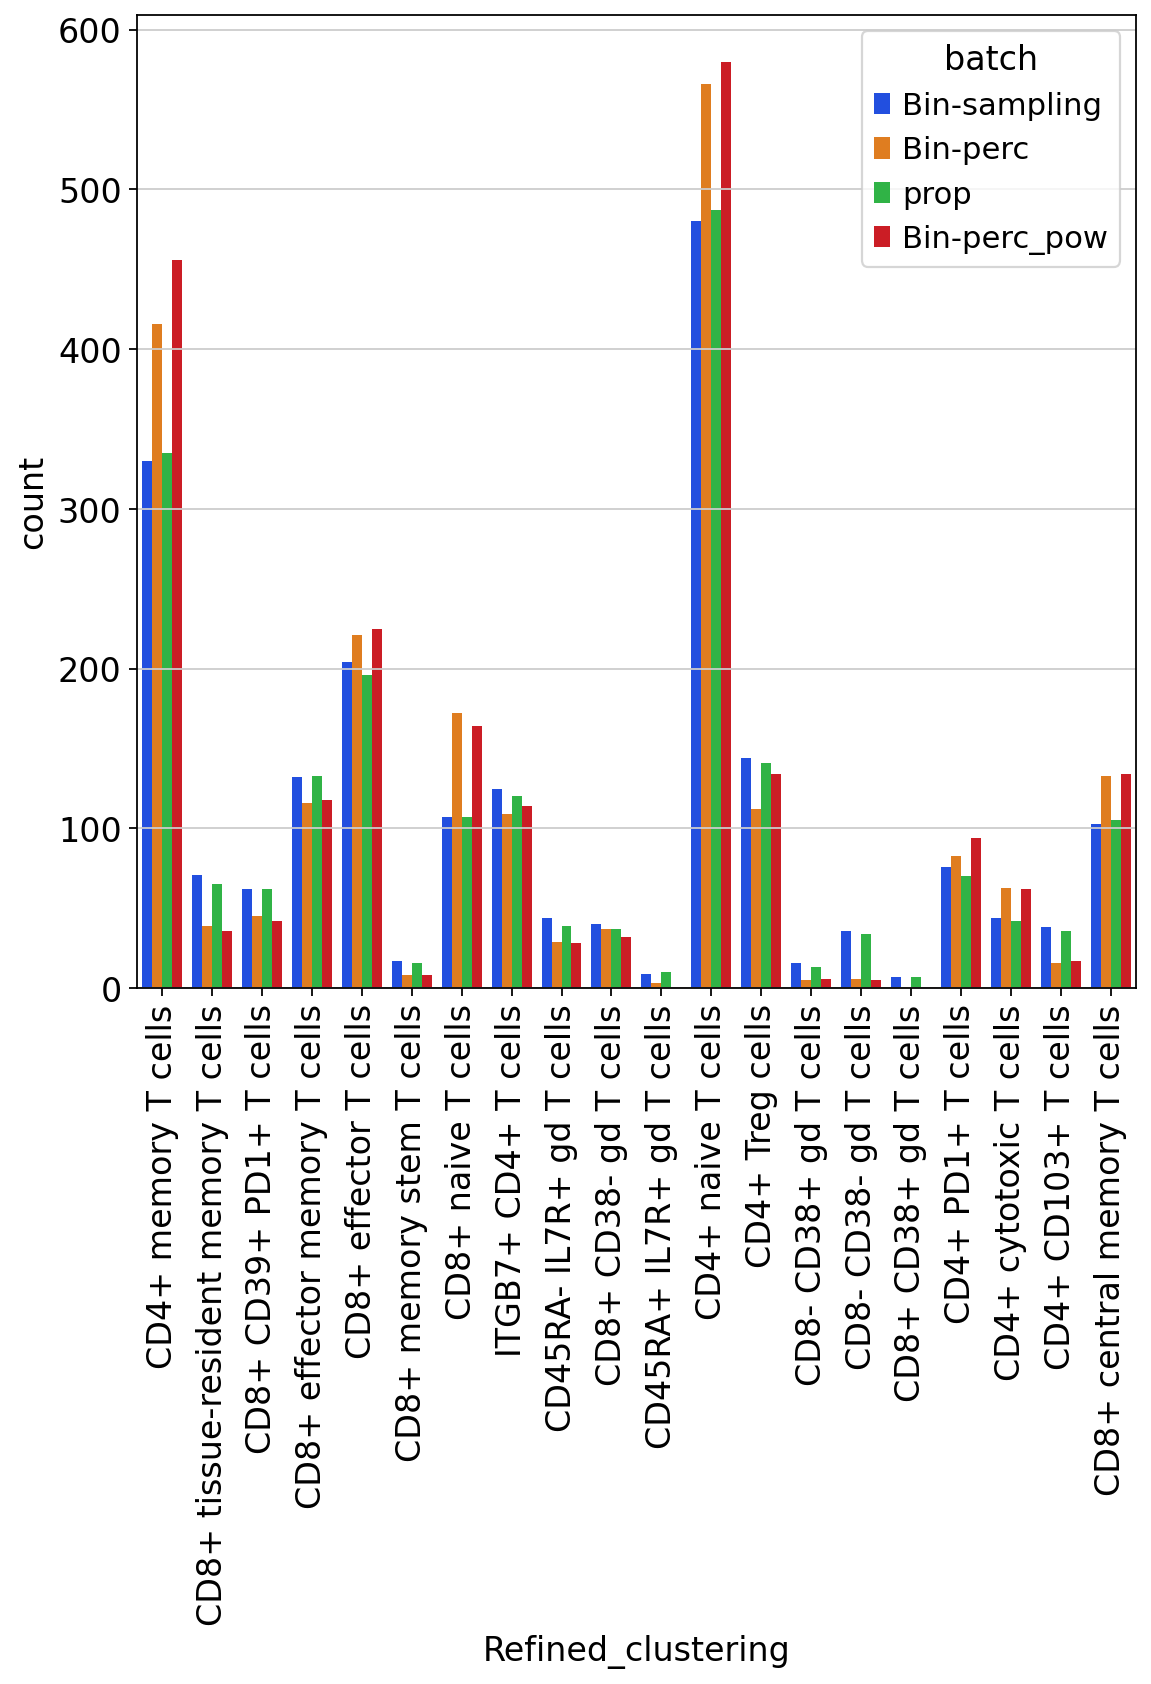

In [39]:
# random_adata.obs['batch'] = 'Uniform'
# partially_adata.obs['batch'] = 'Bin-sampling'
df_mixed = pd.concat([partially_adata.obs, bin_perc_adata.obs, prop_adata.obs, bin_perc_pow_adata.obs])
g2 = sns.countplot(data=df_mixed, x="Refined_clustering", hue="batch", palette="bright")
plt.xticks(rotation=90)

### Take the artificial reference 

In [23]:
s_partially_s, _ = bin_sample(ref_adata, n_bins=14, s_size=20)
print(s_partially_s.size)
s_random_s = sample_random(ref_adata, s_size=s_partially_s.size)
s_prop_s, tot = proportional_sampling(ref_adata, n_bins=16, total_size=189, power= 0.01, seed= 12345)



2971


In [24]:
s_prop_s, tot = proportional_sampling(ref_adata, n_bins=16, total_size=189, power= 0.01, seed= 12345)
print(s_prop_s.size)

2968


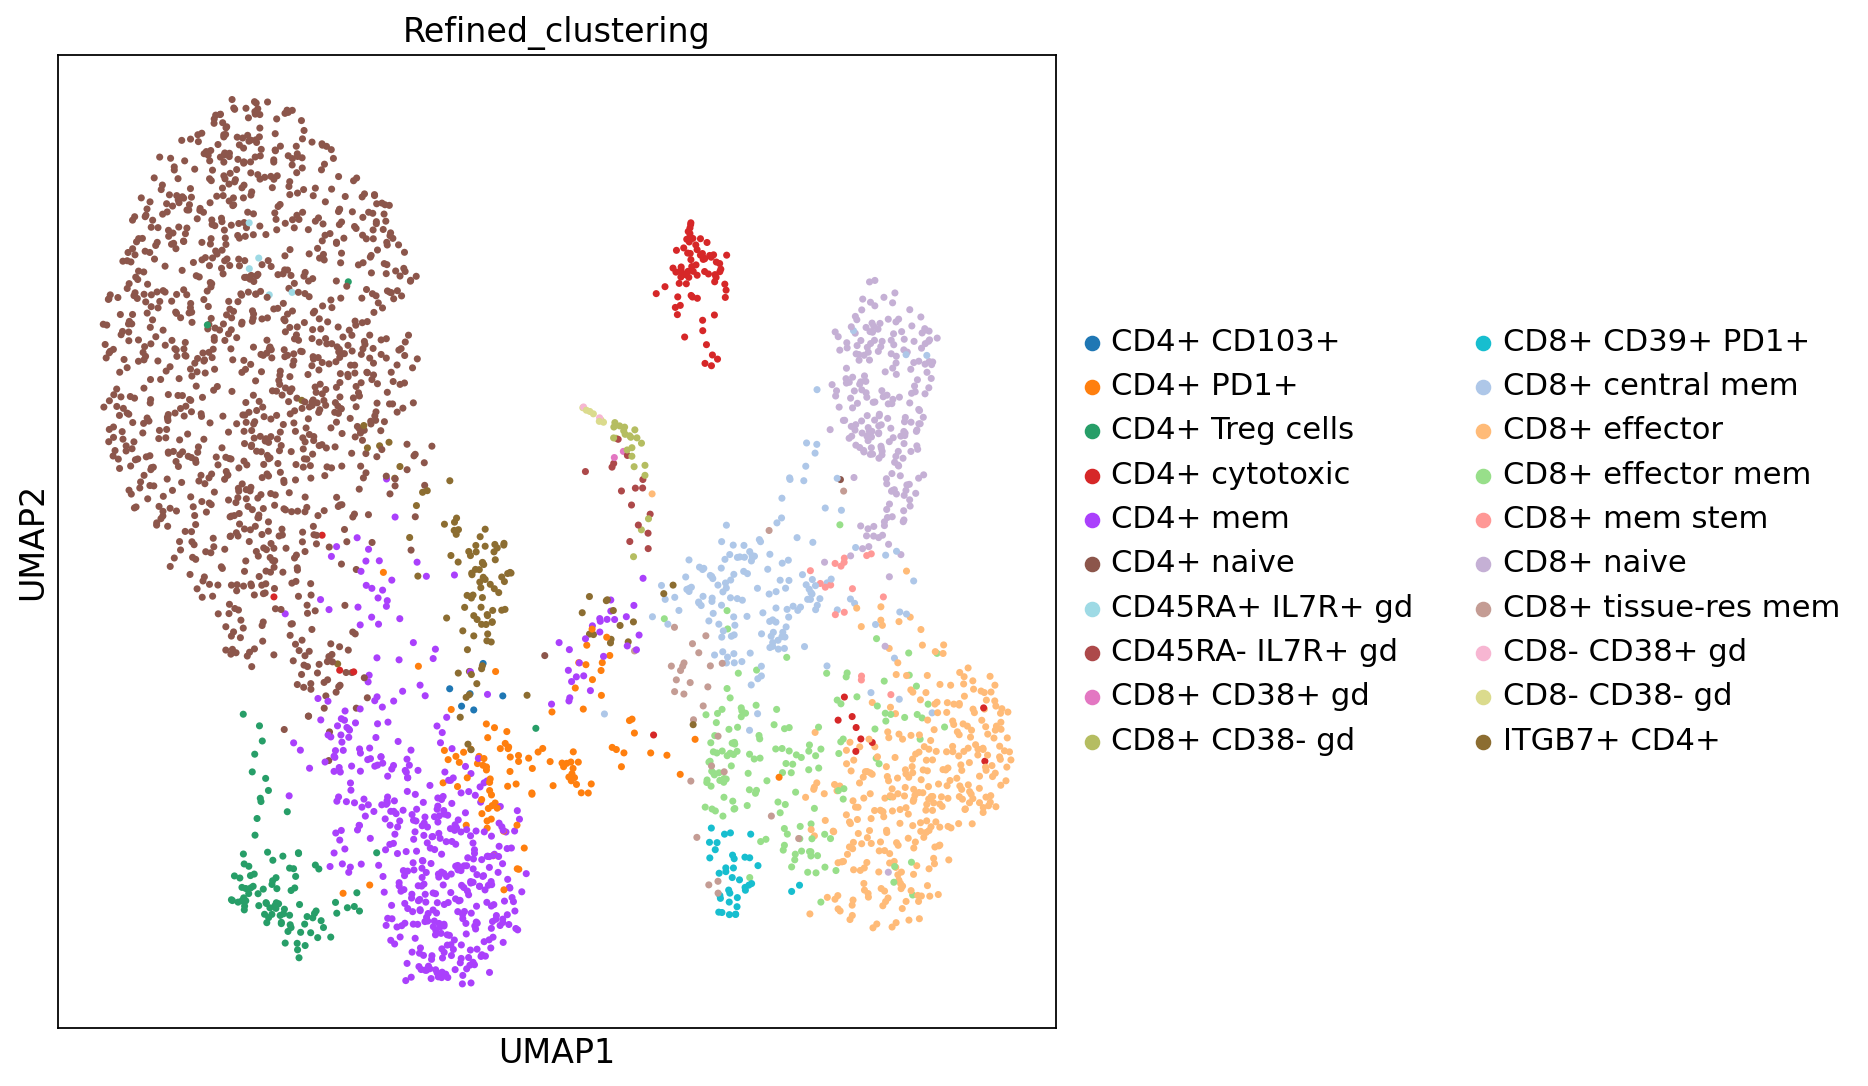

In [25]:
small_random_adata = ref_adata[s_random_s]
plot_umap(small_random_adata, dictionary)



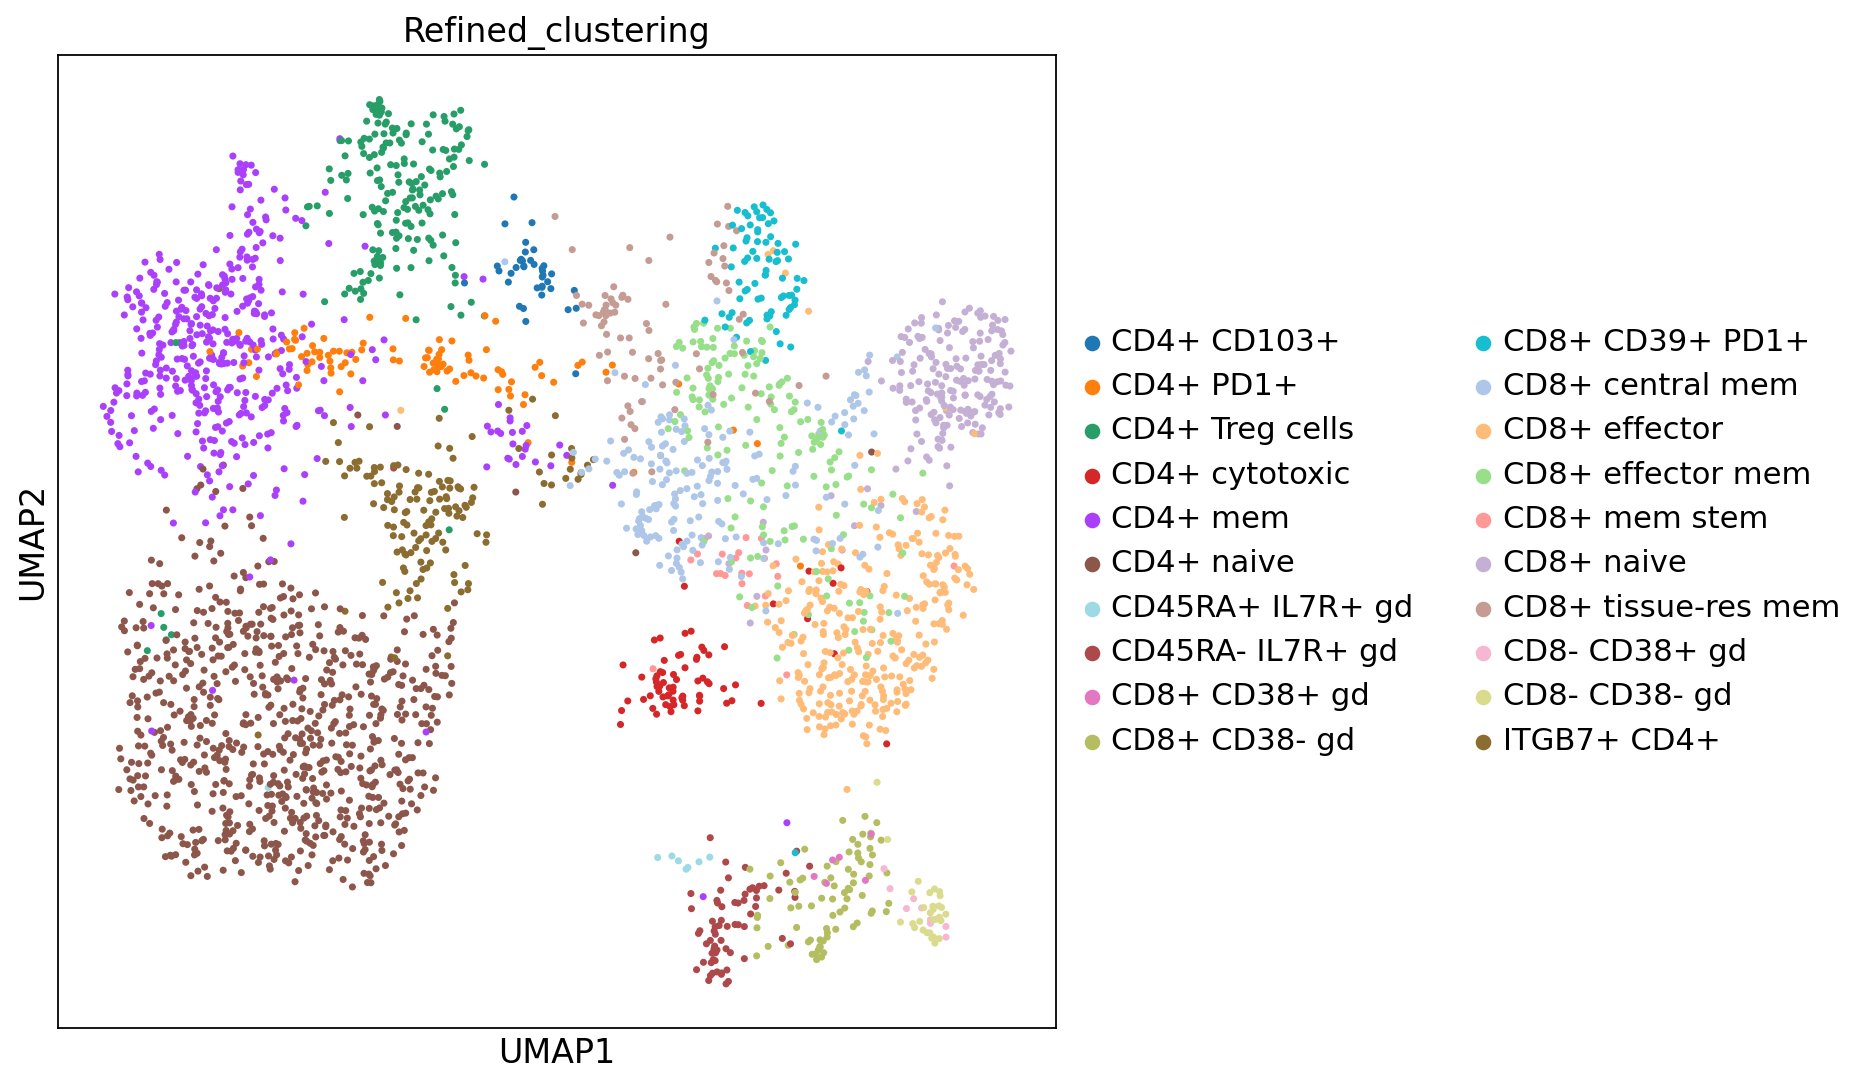

In [26]:
small_partially_adata = ref_adata[s_partially_s]
plot_umap(small_partially_adata, dictionary)

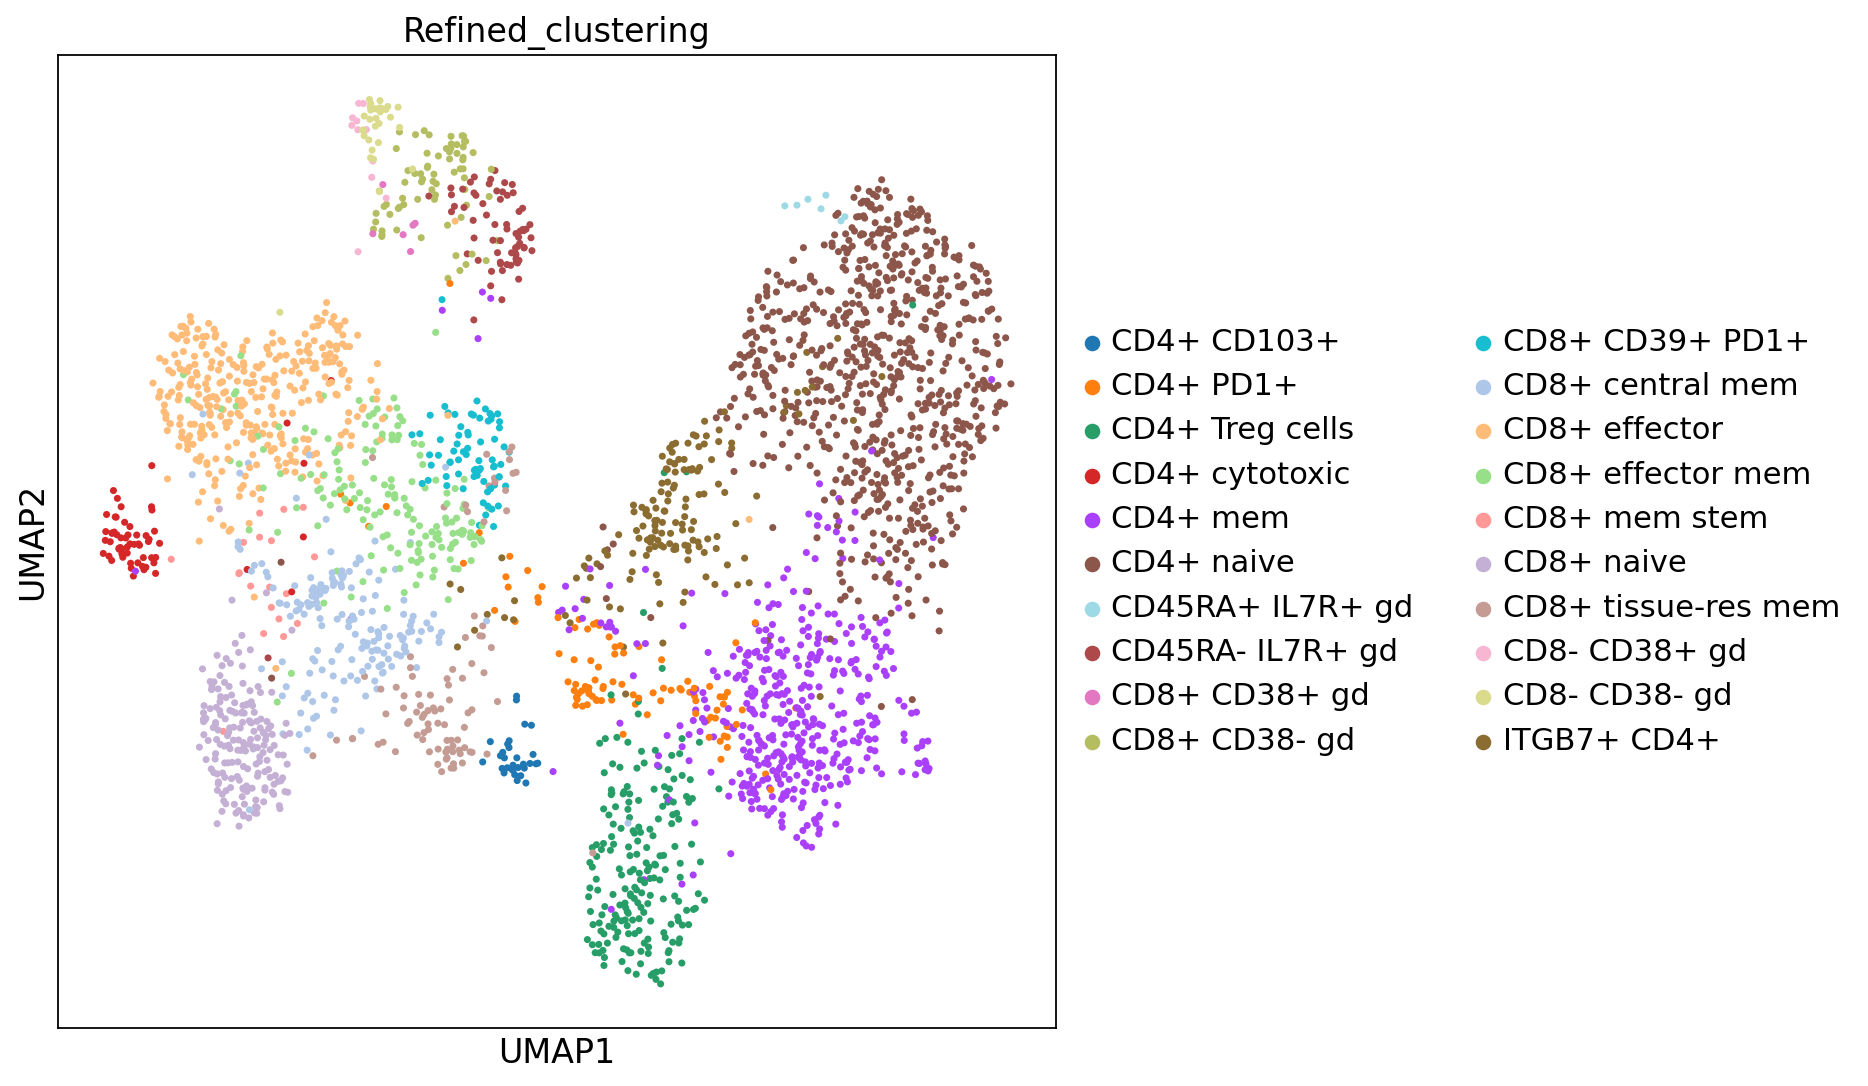

In [27]:
small_prop_adata = ref_adata[s_prop_s]
plot_umap(small_prop_adata, dictionary)

In [28]:
cell_type_order = ref_adata.obs['Refined_clustering'].value_counts().keys().values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CD4+ naive'),
  Text(1, 0, 'CD4+ mem'),
  Text(2, 0, 'CD8+ effector'),
  Text(3, 0, 'CD8+ naive'),
  Text(4, 0, 'CD8+ central mem'),
  Text(5, 0, 'CD8+ effector mem'),
  Text(6, 0, 'ITGB7+ CD4+'),
  Text(7, 0, 'CD4+ PD1+'),
  Text(8, 0, 'CD4+ Treg cells'),
  Text(9, 0, 'CD4+ cytotoxic'),
  Text(10, 0, 'CD8+ CD39+ PD1+'),
  Text(11, 0, 'CD8+ tissue-res mem'),
  Text(12, 0, 'CD8+ CD38- gd'),
  Text(13, 0, 'CD45RA- IL7R+ gd'),
  Text(14, 0, 'CD8+ mem stem'),
  Text(15, 0, 'CD8- CD38- gd'),
  Text(16, 0, 'CD4+ CD103+'),
  Text(17, 0, 'CD8- CD38+ gd'),
  Text(18, 0, 'CD45RA+ IL7R+ gd'),
  Text(19, 0, 'CD8+ CD38+ gd')])

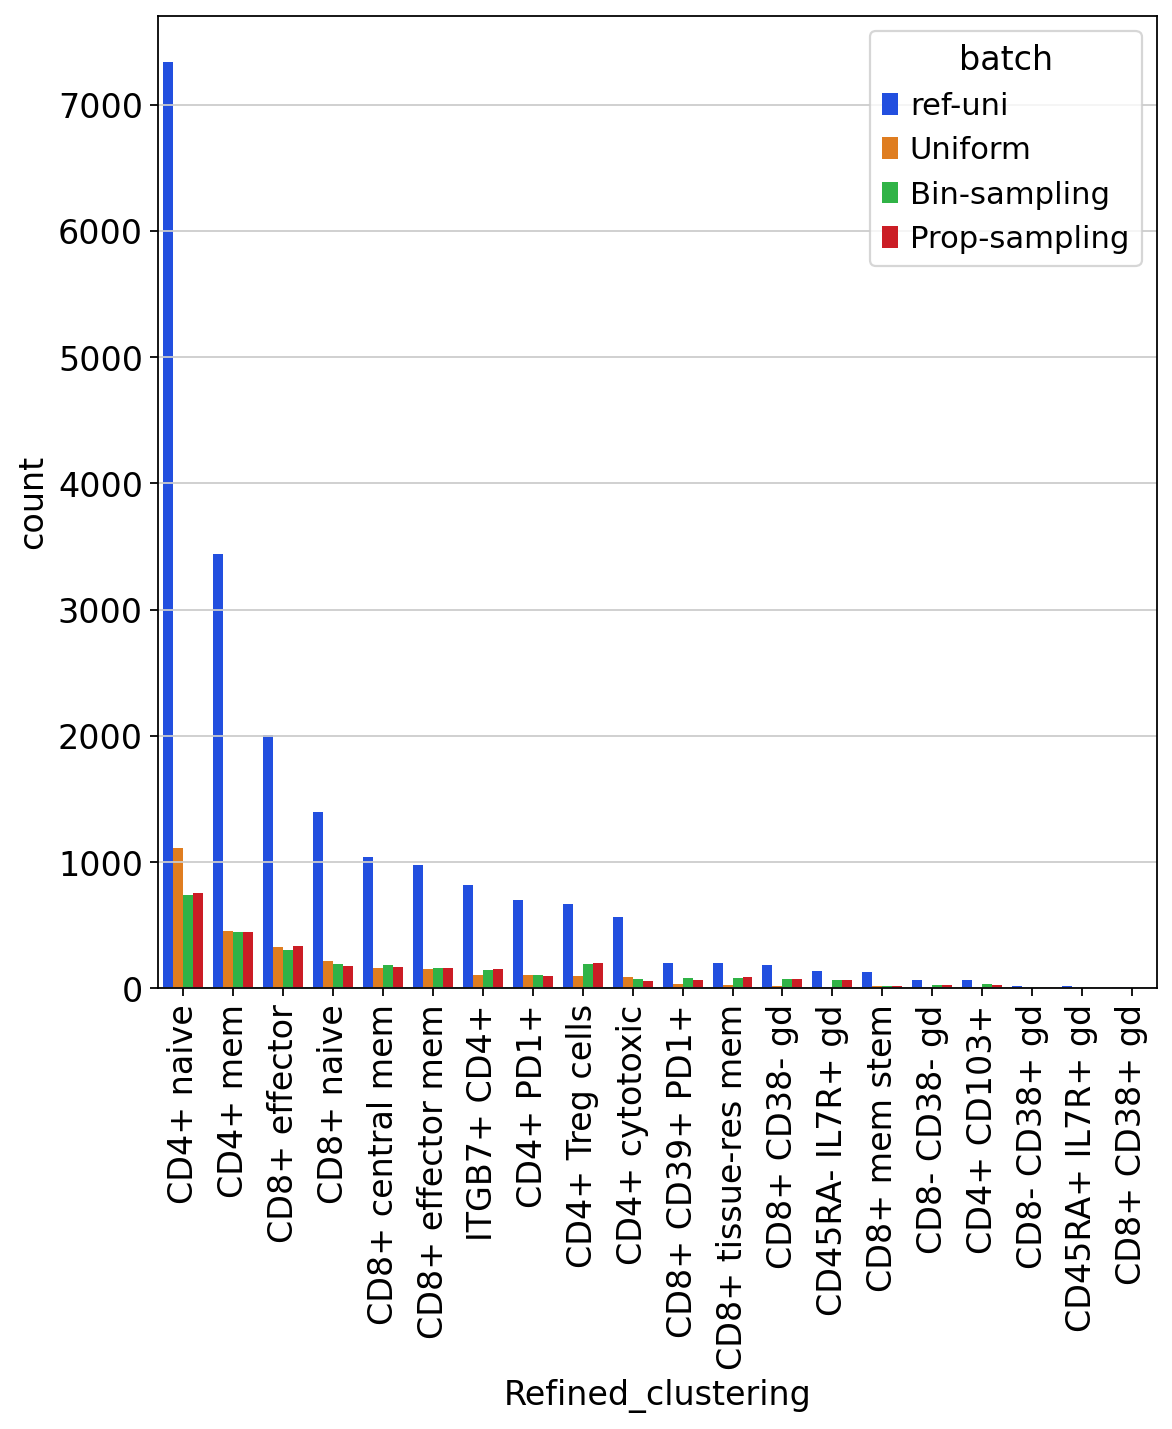

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

ref_adata.obs['batch'] = 'ref-uni'
small_random_adata.obs['batch'] = 'Uniform'
small_partially_adata.obs['batch'] = 'Bin-sampling'
small_prop_adata.obs['batch'] = 'Prop-sampling'
df_mixed = pd.concat([ref_adata.obs, small_random_adata.obs, small_partially_adata.obs, small_prop_adata.obs])
g2 = sns.countplot(data=df_mixed, x="Refined_clustering", hue="batch", palette="bright", order=cell_type_order)
plt.xticks(rotation=90)

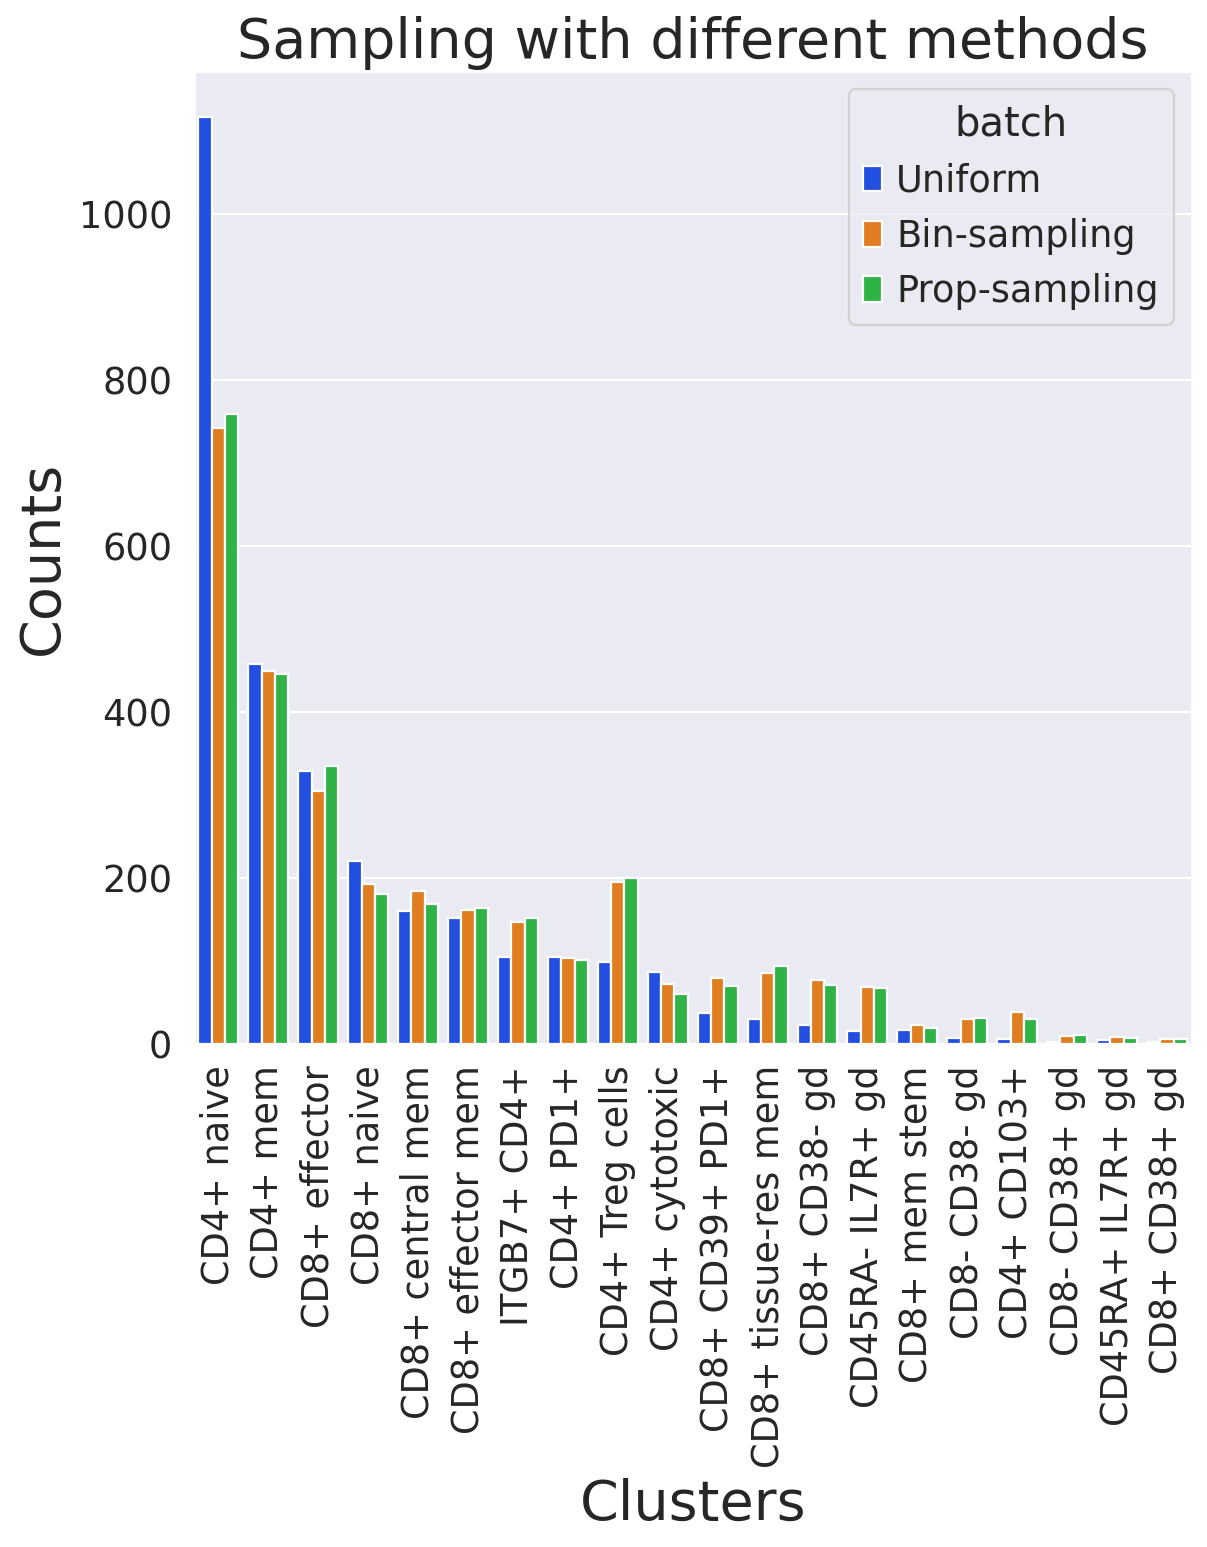

In [133]:
df_mixed = pd.concat([small_random_adata.obs, small_partially_adata.obs, small_prop_adata.obs])
g2 = sns.countplot(data=df_mixed, x="Refined_clustering", hue="batch", palette="bright", order=cell_type_order)
plt.xticks(rotation=90)
plt.ylabel("Counts", size = 25)
plt.xlabel("Clusters", size = 25)
plt.title("Sampling with different methods", size= 25)
plt.savefig("all_methods.png", dpi=200, bbox_inches='tight', pad_inches = 0.5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CD4+ naive'),
  Text(1, 0, 'CD4+ mem'),
  Text(2, 0, 'CD8+ effector'),
  Text(3, 0, 'CD8+ naive'),
  Text(4, 0, 'CD8+ central mem'),
  Text(5, 0, 'CD8+ effector mem'),
  Text(6, 0, 'ITGB7+ CD4+'),
  Text(7, 0, 'CD4+ PD1+'),
  Text(8, 0, 'CD4+ Treg cells'),
  Text(9, 0, 'CD4+ cytotoxic'),
  Text(10, 0, 'CD8+ CD39+ PD1+'),
  Text(11, 0, 'CD8+ tissue-res mem'),
  Text(12, 0, 'CD8+ CD38- gd'),
  Text(13, 0, 'CD45RA- IL7R+ gd'),
  Text(14, 0, 'CD8+ mem stem'),
  Text(15, 0, 'CD8- CD38- gd'),
  Text(16, 0, 'CD4+ CD103+'),
  Text(17, 0, 'CD8- CD38+ gd'),
  Text(18, 0, 'CD45RA+ IL7R+ gd'),
  Text(19, 0, 'CD8+ CD38+ gd')])

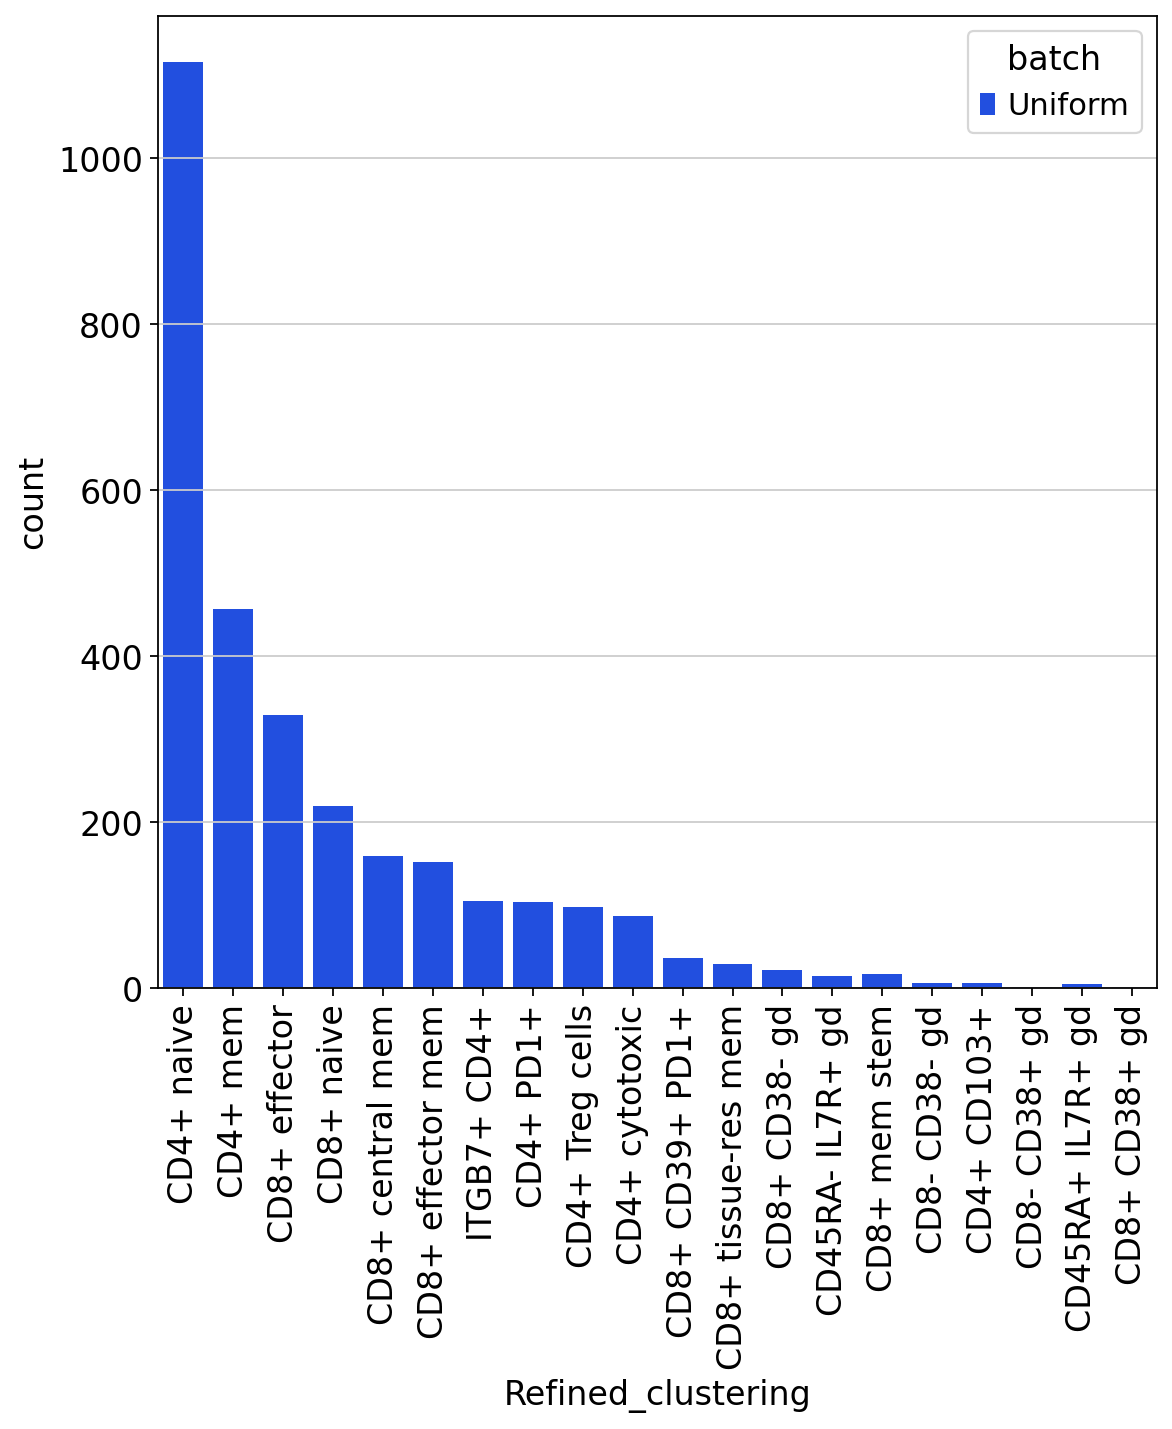

In [31]:
df_mixed = pd.concat([small_random_adata.obs])
g2 = sns.countplot(data=df_mixed, x="Refined_clustering", hue="batch", palette="bright", order=cell_type_order)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CD4+ naive'),
  Text(1, 0, 'CD4+ mem'),
  Text(2, 0, 'CD8+ effector'),
  Text(3, 0, 'CD8+ naive'),
  Text(4, 0, 'CD8+ central mem'),
  Text(5, 0, 'CD8+ effector mem'),
  Text(6, 0, 'ITGB7+ CD4+'),
  Text(7, 0, 'CD4+ PD1+'),
  Text(8, 0, 'CD4+ Treg cells'),
  Text(9, 0, 'CD4+ cytotoxic'),
  Text(10, 0, 'CD8+ CD39+ PD1+'),
  Text(11, 0, 'CD8+ tissue-res mem'),
  Text(12, 0, 'CD8+ CD38- gd'),
  Text(13, 0, 'CD45RA- IL7R+ gd'),
  Text(14, 0, 'CD8+ mem stem'),
  Text(15, 0, 'CD8- CD38- gd'),
  Text(16, 0, 'CD4+ CD103+'),
  Text(17, 0, 'CD8- CD38+ gd'),
  Text(18, 0, 'CD45RA+ IL7R+ gd'),
  Text(19, 0, 'CD8+ CD38+ gd')])

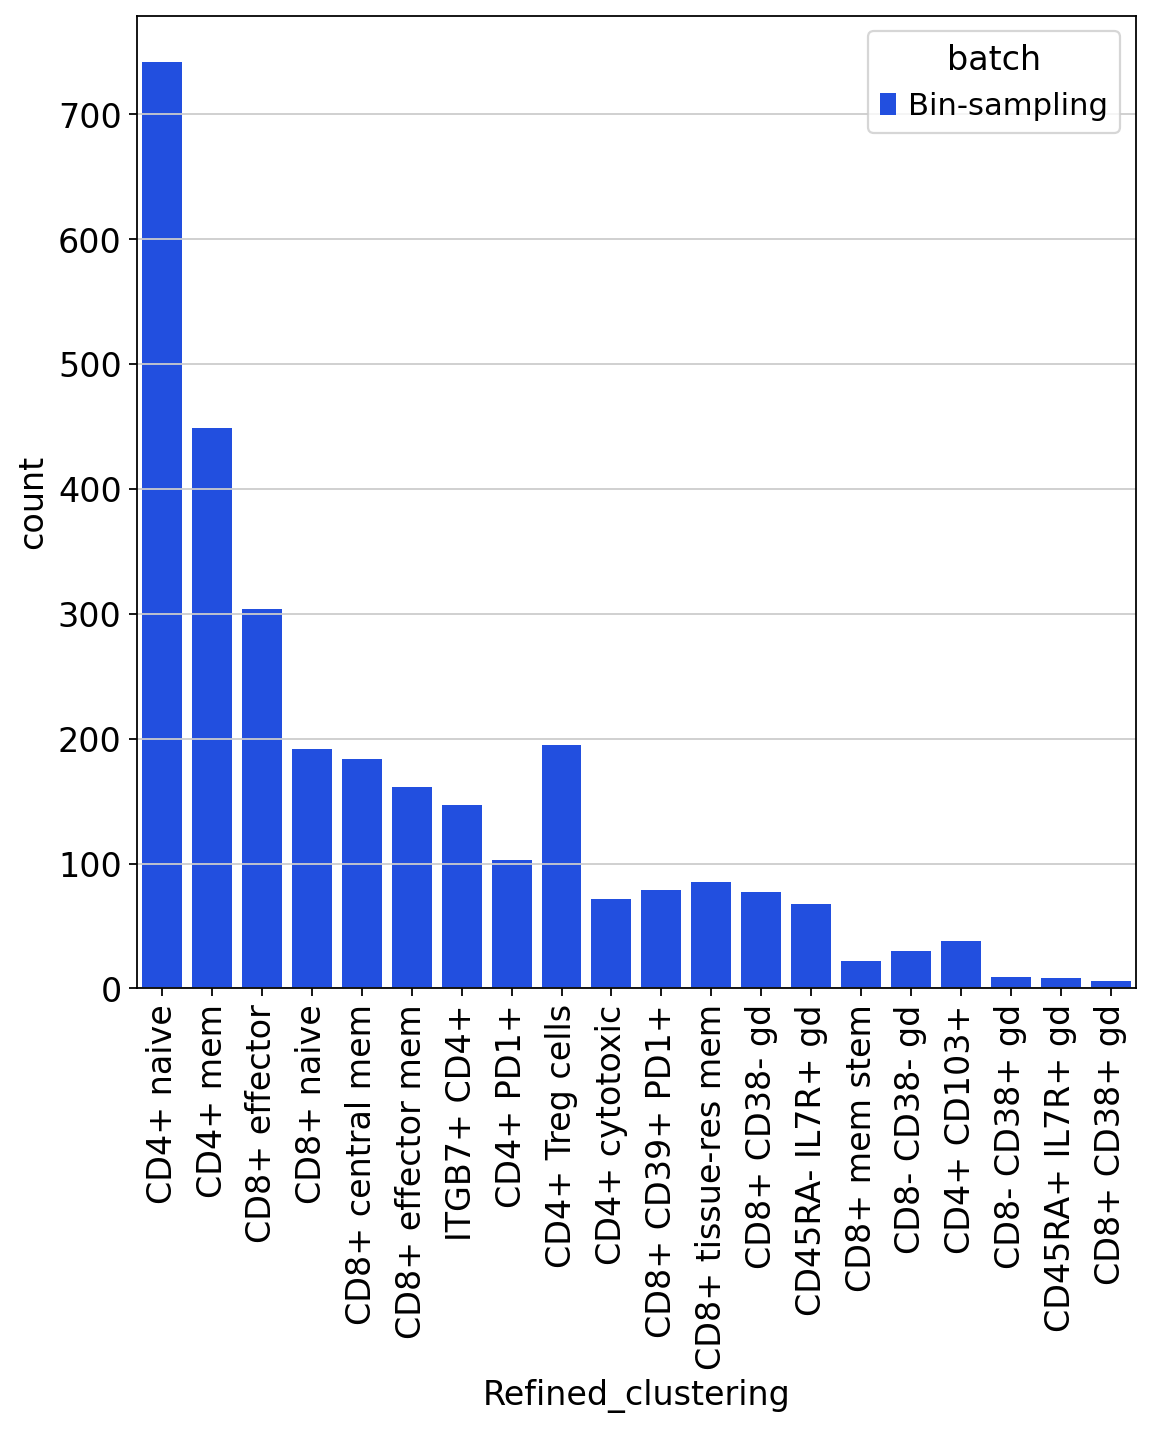

In [32]:
df_mixed = pd.concat([small_partially_adata.obs])
g2 = sns.countplot(data=df_mixed, x="Refined_clustering", hue="batch", palette="bright", order=cell_type_order)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CD4+ naive'),
  Text(1, 0, 'CD4+ mem'),
  Text(2, 0, 'CD8+ effector'),
  Text(3, 0, 'CD8+ naive'),
  Text(4, 0, 'CD8+ central mem'),
  Text(5, 0, 'CD8+ effector mem'),
  Text(6, 0, 'ITGB7+ CD4+'),
  Text(7, 0, 'CD4+ PD1+'),
  Text(8, 0, 'CD4+ Treg cells'),
  Text(9, 0, 'CD4+ cytotoxic'),
  Text(10, 0, 'CD8+ CD39+ PD1+'),
  Text(11, 0, 'CD8+ tissue-res mem'),
  Text(12, 0, 'CD8+ CD38- gd'),
  Text(13, 0, 'CD45RA- IL7R+ gd'),
  Text(14, 0, 'CD8+ mem stem'),
  Text(15, 0, 'CD8- CD38- gd'),
  Text(16, 0, 'CD4+ CD103+'),
  Text(17, 0, 'CD8- CD38+ gd'),
  Text(18, 0, 'CD45RA+ IL7R+ gd'),
  Text(19, 0, 'CD8+ CD38+ gd')])

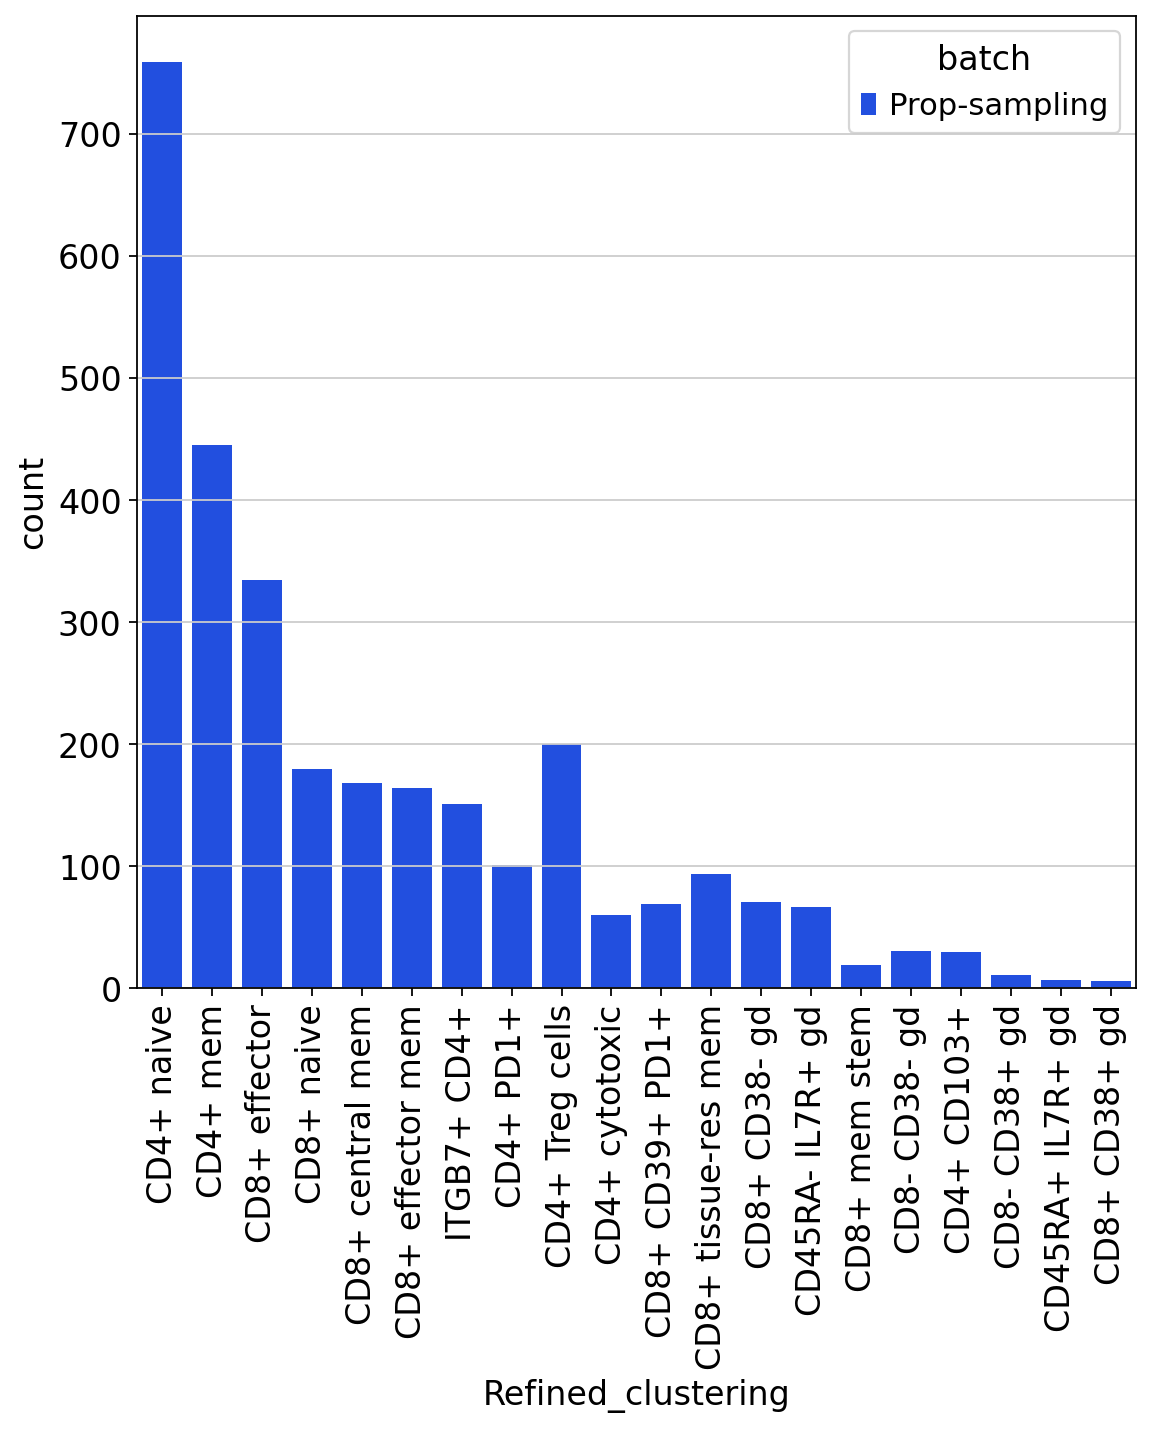

In [33]:
df_mixed = pd.concat([small_prop_adata.obs])
g2 = sns.countplot(data=df_mixed, x="Refined_clustering", hue="batch", palette="bright", order=cell_type_order)
plt.xticks(rotation=90)

In [34]:
df_mixed = pd.concat([small_random_adata.obs, small_partially_adata.obs, small_prop_adata])
g2 = sns.countplot(data=df_mixed, x="Refined_clustering", hue="batch", palette="bright")
plt.xticks(rotation=90)

TypeError: cannot concatenate object of type '<class 'anndata._core.anndata.AnnData'>'; only Series and DataFrame objs are valid

### Bootstraping

In [37]:
def repeat_sampling(ref_adata, rep = 5, seed=12345):
    np.random.seed(seed)
    
    groupped_df = pd.DataFrame(data=None, columns=["count", "Refined_clustering", "batch"])
    for i in range(rep):
        new_seed = np.random.randint(100000)
        
        ps,_ = bin_sample(ref_adata, n_bins=14, s_size=20, seed=new_seed)
        rs = sample_random(ref_adata, s_size=ps.size, seed=new_seed)
        prop_s, _ = proportional_sampling(ref_adata, n_bins=14, total_size=150, power= 0.01, seed= new_seed)
        # bpp_s, tot = bin_sampleـpercentile_power(ref_adata, n_bins=14, total_size=150, power= 1, seed= new_seed)



        a= ref_adata[rs].obs['Refined_clustering'].value_counts().to_list()
        b= list(ref_adata[rs].obs['Refined_clustering'].value_counts().keys())
        c = ["Uniform" for i in a]
        g_df1 = pd.DataFrame({"count": a, "Refined_clustering": b, "batch": c})
        
        a= ref_adata[ps].obs['Refined_clustering'].value_counts().to_list()
        b= list(ref_adata[ps].obs['Refined_clustering'].value_counts().keys())
        c = ["Bin-sampling" for i in a]
        g_df2 = pd.DataFrame({"count": a, "Refined_clustering": b, "batch": c})
        

        a= ref_adata[prop_s].obs['Refined_clustering'].value_counts().to_list()
        b= list(ref_adata[prop_s].obs['Refined_clustering'].value_counts().keys())
        c = ["Proportional_per_bin_counts" for i in a]
        g_df3 = pd.DataFrame({"count": a, "Refined_clustering": b, "batch": c})
        
        # a= ref_adata[bpp_s].obs['Refined_clustering'].value_counts().to_list()
        # b= list(ref_adata[bpp_s].obs['Refined_clustering'].value_counts().keys())
        # c = ["percentile_pow=1" for i in a]
        # g_df4 = pd.DataFrame({"count": a, "Refined_clustering": b, "batch": c})
        
        groupped_df = pd.concat([groupped_df, g_df1, g_df2, g_df3])
    return groupped_df

In [38]:
# ps = bin_sample(ref_adata, n_bins=14, s_size=20)
# print(ps.size)
# rs = sample_random(ref_adata, s_size=ps.size)

In [39]:
df = repeat_sampling(ref_adata, rep=40)
l = df['Refined_clustering'].unique()

In [40]:
df['batch'].unique()

array(['Uniform', 'Bin-sampling', 'Proportional_per_bin_counts'],
      dtype=object)

In [41]:
m1 = df[df['batch'].isin(['Uniform'])]
m2 = df[df['batch'].isin(['Bin-sampling'])]
m3 = df[df['batch'].isin(['Proportional_per_bin_counts'])]

In [42]:
# m1 = df[df['batch'].isin(['Uniform'])]
# m2 = df[df['batch'].isin(['Proportional_per_bin_counts', 'percentile_pow=1'])]

In [43]:
# l = df['Refined_clustering'].unique()
# l1, l2, l3, l4 = np.array_split(l, 4)
# sub_df1 = df[df['Refined_clustering'].isin(l1)]
# sub_df2 = df[df['Refined_clustering'].isin(l2)]
# sub_df3 = df[df['Refined_clustering'].isin(l3)]
# sub_df4 = df[df['Refined_clustering'].isin(l4)]

In [44]:
l = df['Refined_clustering'].unique()
# sub_df1 = df[df['Refined_clustering'].isin(l1)]
# sub_df2 = df[df['Refined_clustering'].isin(l2)]
# sub_df3 = df[df['Refined_clustering'].isin(l3)]
# sub_df4 = df[df['Refined_clustering'].isin(l4)]

In [45]:
ref_adata.obs['Refined_clustering'].value_counts()

CD4+ naive             7338
CD4+ mem               3439
CD8+ effector          2009
CD8+ naive             1401
CD8+ central mem       1039
CD8+ effector mem       978
ITGB7+ CD4+             816
CD4+ PD1+               700
CD4+ Treg cells         667
CD4+ cytotoxic          568
CD8+ CD39+ PD1+         204
CD8+ tissue-res mem     198
CD8+ CD38- gd           189
CD45RA- IL7R+ gd        140
CD8+ mem stem           132
CD8- CD38- gd            66
CD4+ CD103+              65
CD8- CD38+ gd            22
CD45RA+ IL7R+ gd         20
CD8+ CD38+ gd             9
Name: Refined_clustering, dtype: int64

In [46]:
m1['Refined_clustering'].value_counts()

CD4+ naive             40
CD4+ cytotoxic         40
CD4+ CD103+            40
CD8- CD38- gd          40
CD8+ CD39+ PD1+        40
CD45RA- IL7R+ gd       40
CD8+ mem stem          40
CD8+ tissue-res mem    40
CD4+ mem               40
CD8+ CD38- gd          40
CD4+ PD1+              40
CD4+ Treg cells        40
ITGB7+ CD4+            40
CD8+ effector mem      40
CD8+ central mem       40
CD8+ naive             40
CD8+ effector          40
CD8- CD38+ gd          39
CD45RA+ IL7R+ gd       38
CD8+ CD38+ gd          33
Name: Refined_clustering, dtype: int64

In [87]:
m2['Refined_clustering'].value_counts()

CD4+ naive             40
CD4+ mem               40
CD45RA+ IL7R+ gd       40
CD8- CD38+ gd          40
CD8+ mem stem          40
CD8- CD38- gd          40
CD4+ CD103+            40
CD45RA- IL7R+ gd       40
CD4+ cytotoxic         40
CD8+ CD38- gd          40
CD8+ CD39+ PD1+        40
CD8+ tissue-res mem    40
CD4+ PD1+              40
ITGB7+ CD4+            40
CD8+ effector mem      40
CD8+ central mem       40
CD8+ naive             40
CD4+ Treg cells        40
CD8+ effector          40
CD8+ CD38+ gd          40
Name: Refined_clustering, dtype: int64

In [88]:
m3['Refined_clustering'].value_counts()

CD4+ naive             40
CD4+ mem               40
CD8- CD38+ gd          40
CD45RA+ IL7R+ gd       40
CD8+ mem stem          40
CD8- CD38- gd          40
CD4+ CD103+            40
CD45RA- IL7R+ gd       40
CD8+ CD39+ PD1+        40
CD8+ CD38- gd          40
CD8+ tissue-res mem    40
CD4+ cytotoxic         40
CD4+ PD1+              40
ITGB7+ CD4+            40
CD8+ naive             40
CD8+ central mem       40
CD8+ effector mem      40
CD4+ Treg cells        40
CD8+ effector          40
CD8+ CD38+ gd          40
Name: Refined_clustering, dtype: int64

In [47]:
sns.set(font_scale=1.5)


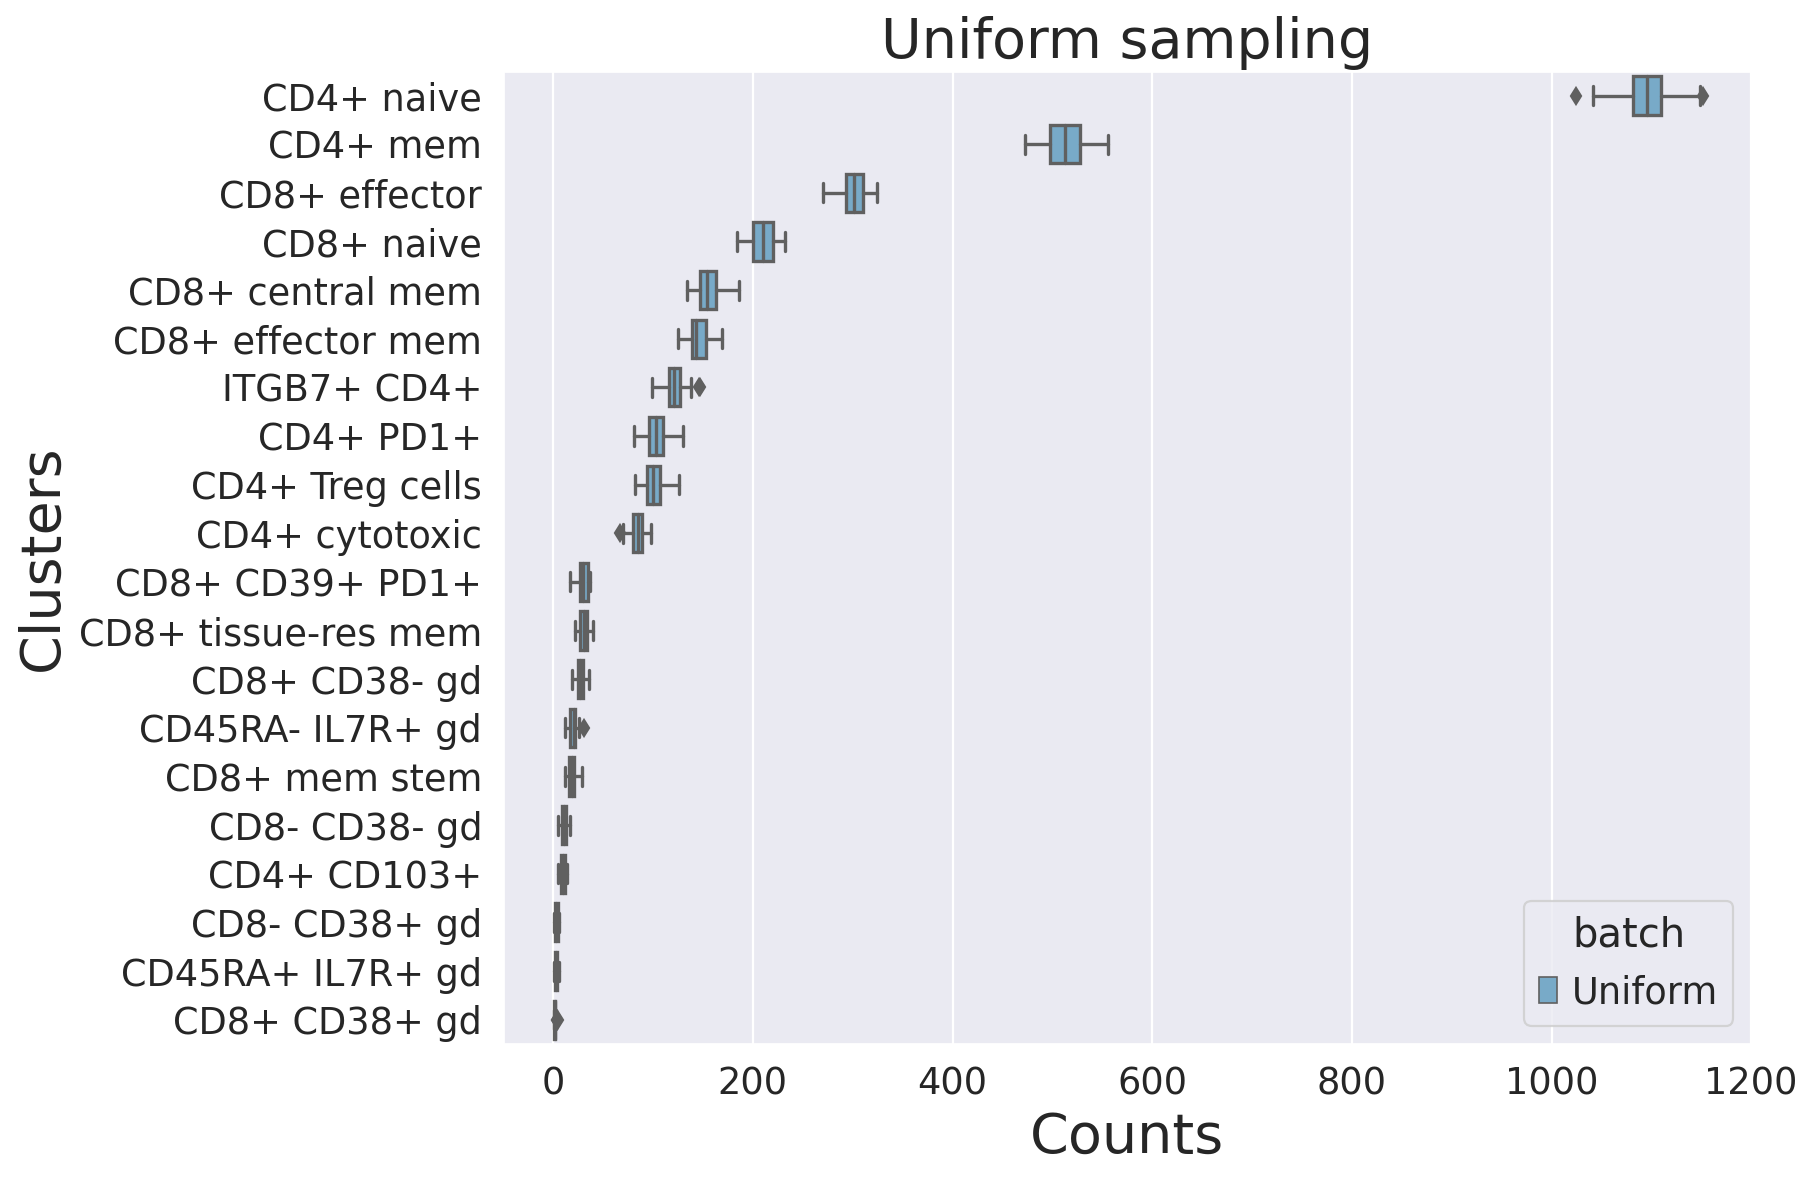

In [48]:
plt.figure(figsize=(10, 8))
g = sns.boxplot(y="Refined_clustering", x="count", hue='batch',data=m1, orient='h', order= cell_type_order, palette="Blues")
plt.xlim(-50, 1200)
# plt.xticks(rotation=90)
plt.ylabel("Clusters", size = 25)
plt.xlabel("Counts", size = 25)
plt.title("Uniform sampling", size= 25)
plt.savefig("Uniform.png", dpi=200, bbox_inches='tight', pad_inches = 0.5)

In [49]:
m2['batch'] = "Fixed_size_bin_sampling"

/tmp/5897272.1.all.q/ipykernel_157775/858523626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2['batch'] = "Fixed_size_bin_sampling"


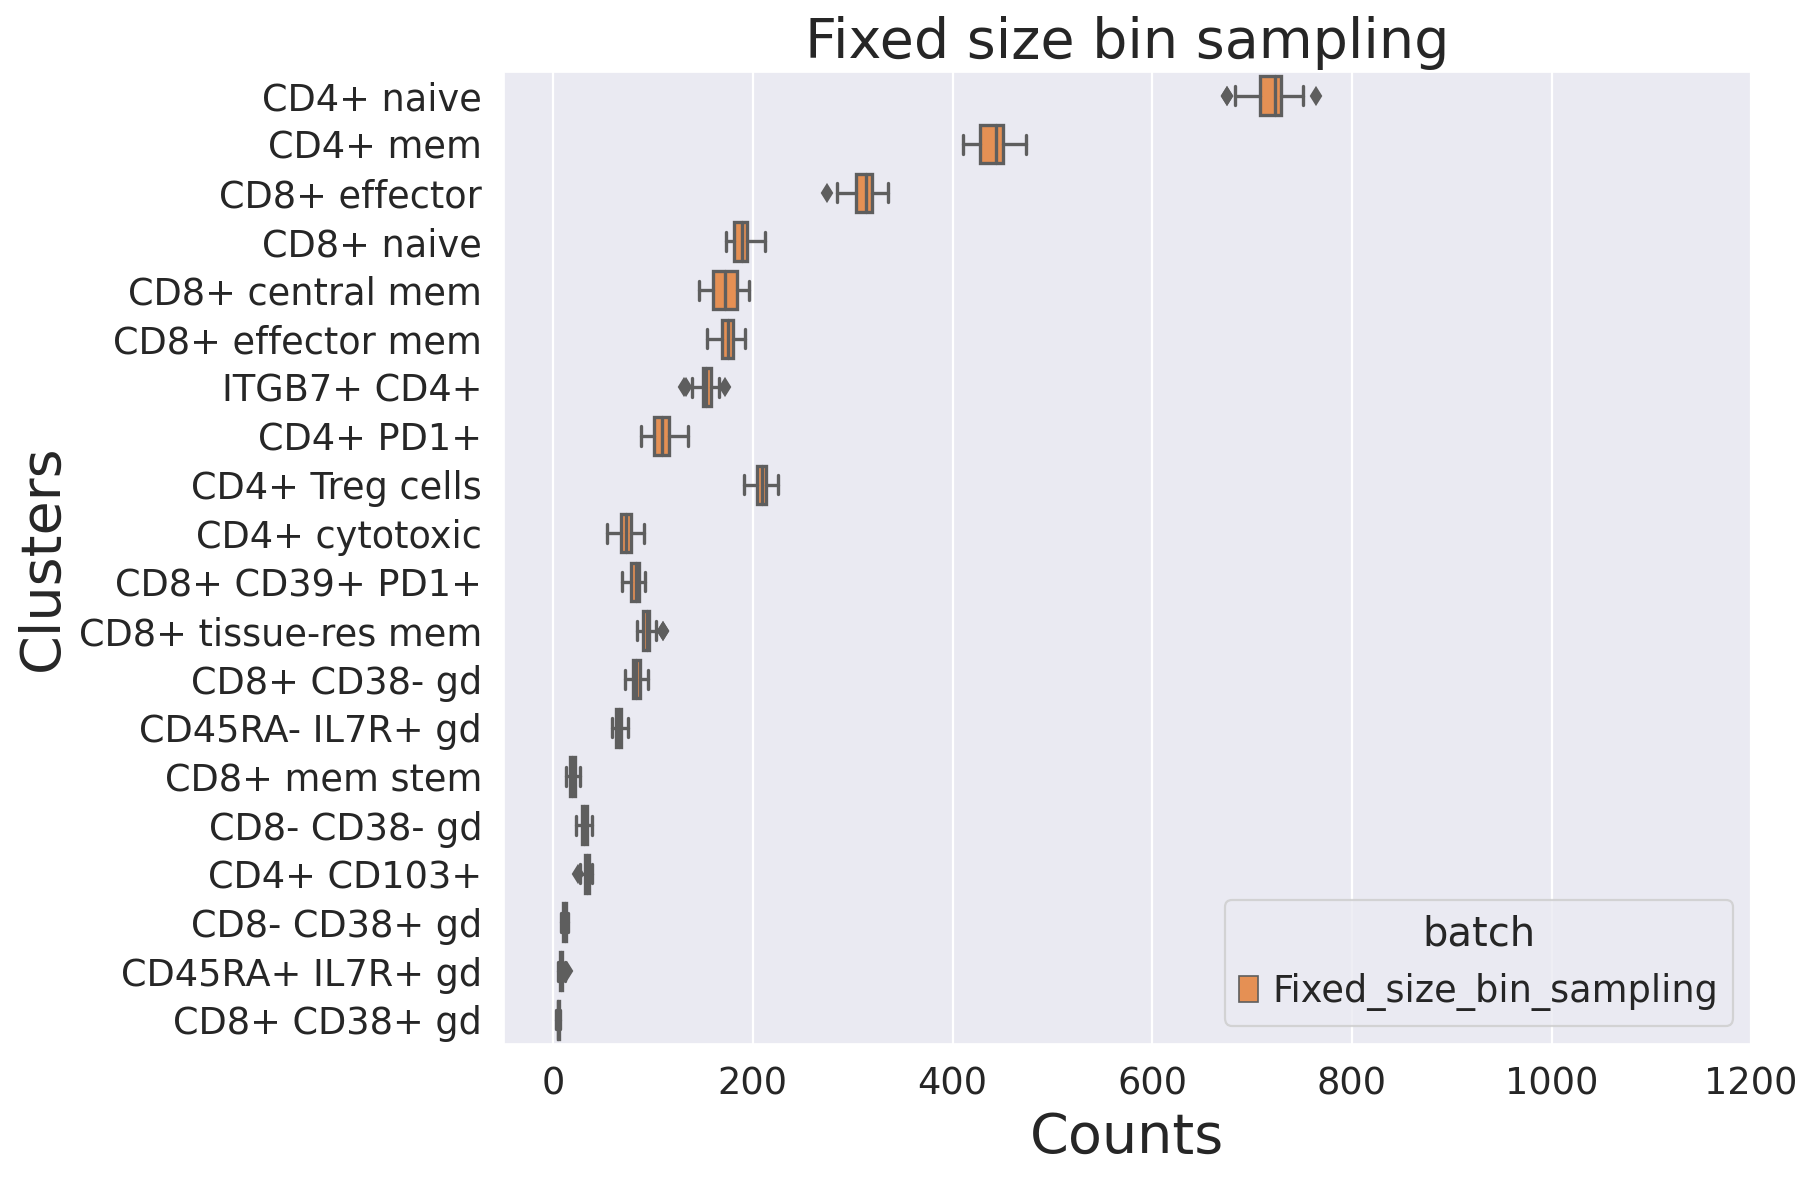

In [50]:
plt.figure(figsize=(10, 8))
g = sns.boxplot(y="Refined_clustering", x="count", hue='batch',data=m2, orient='h', order= cell_type_order, palette='Oranges')
plt.xlim(-50, 1200)
# plt.xticks(rotation=90)
plt.ylabel("Clusters", size = 25)
plt.xlabel("Counts", size = 25)
plt.title("Fixed size bin sampling",  size= 25)
plt.savefig("Fixed_size_bin_sampling.png", dpi=200, bbox_inches='tight', pad_inches = 0.5)

In [51]:
m3['batch'] = "Proportional_per_bin_counts"

/tmp/5897272.1.all.q/ipykernel_157775/3258943198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m3['batch'] = "Proportional_per_bin_counts"


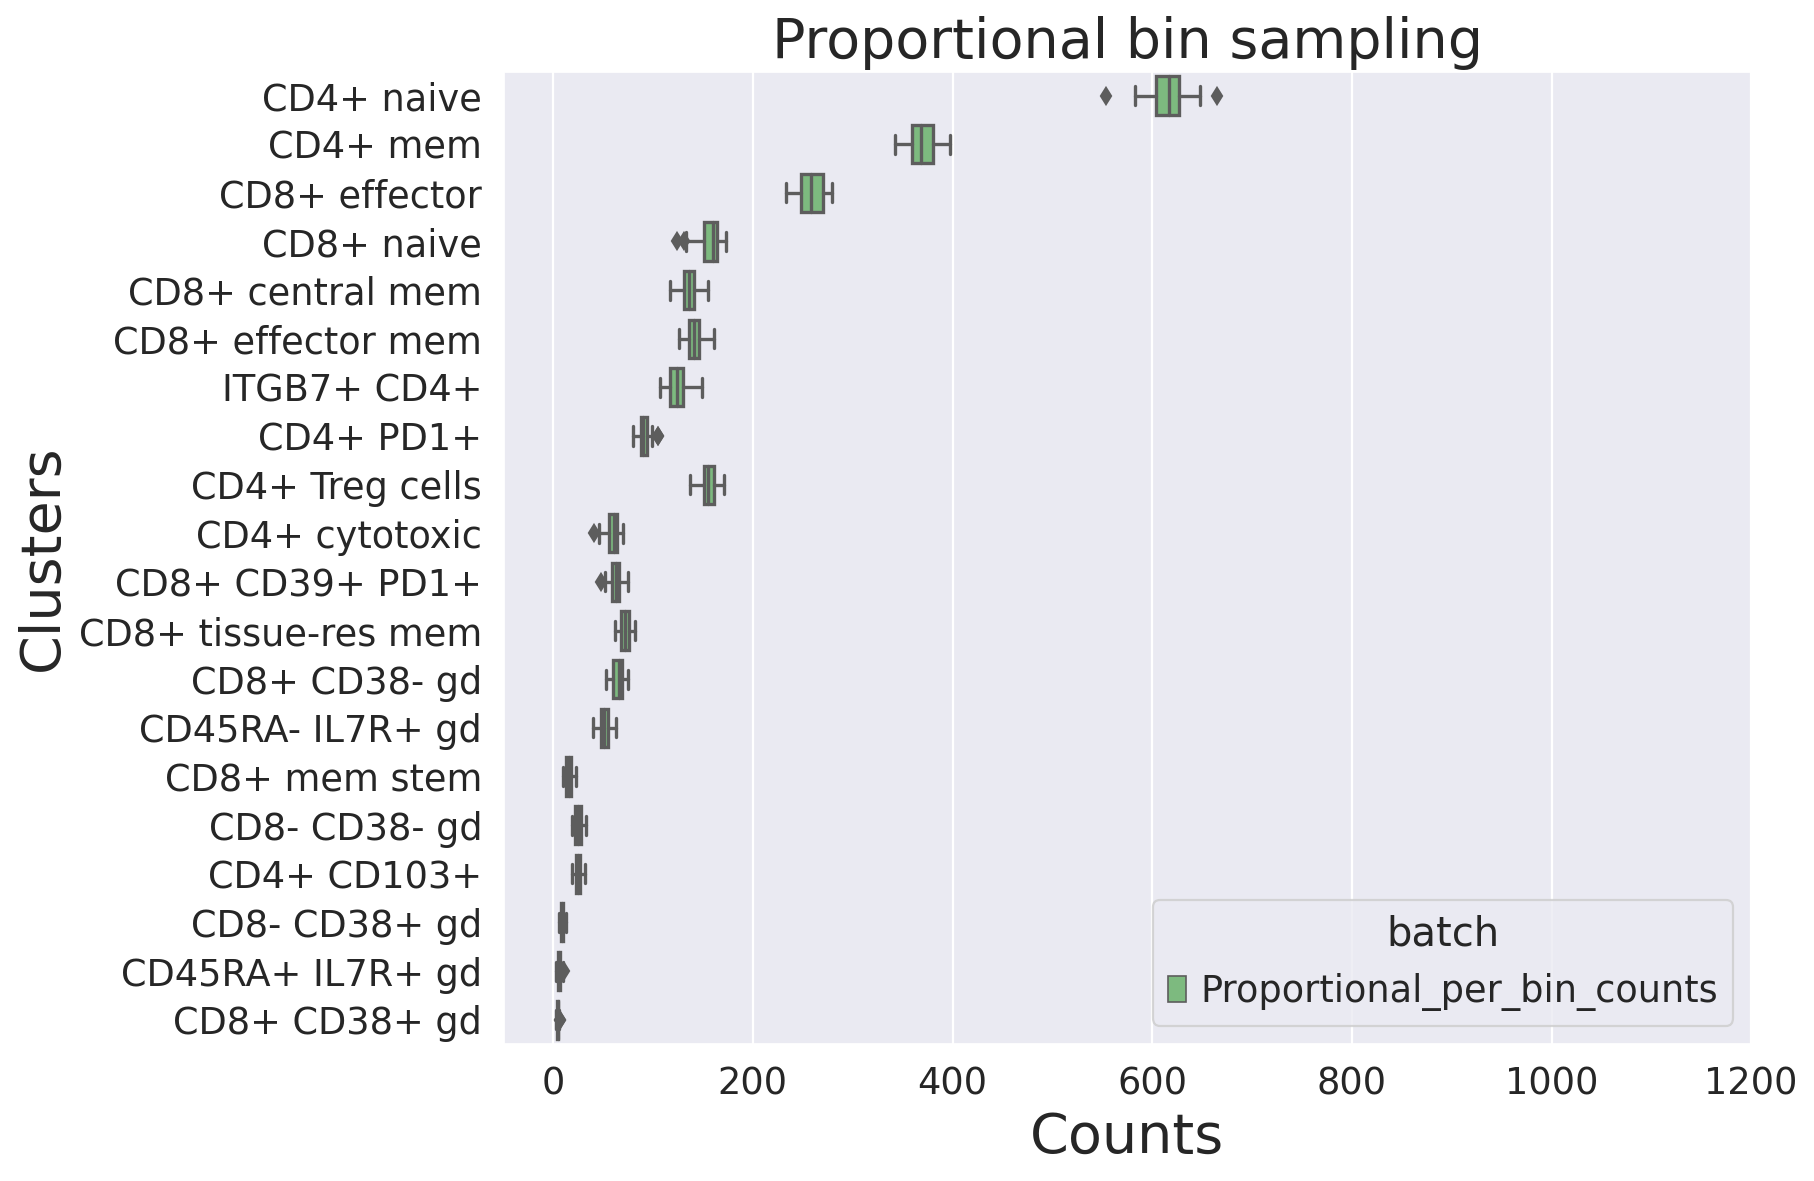

In [52]:
plt.figure(figsize=(10, 8))
g = sns.boxplot(y="Refined_clustering", x="count", hue='batch',data=m3, orient='h', order= cell_type_order, palette="Greens")
plt.xlim(-50, 1200)
# plt.xticks(rotation=90)
plt.ylabel("Clusters", size = 25)
plt.xlabel("Counts", size = 25)
plt.title("Proportional bin sampling",  size= 25)
plt.savefig("Proportional_per_bin_counts.png", dpi=200, bbox_inches='tight', pad_inches = 0.5)

In [43]:
# plt.figure(figsize=(10, 8))
# g = sns.boxplot(x="Refined_clustering", y="count", hue='batch',data=sub_df2, )
# plt.xticks(rotation=90)
# # plt.ylabel("Salary in US Dollars", size=14)
# plt.xlabel("Refined_clustering",size=14)
# plt.title("Subsampling of TCell panel_part2", size=18)
# # plt.savefig("grouped_boxplot_Seaborn_boxplot_Python.png")

In [44]:
# plt.figure(figsize=(10, 8))
# g = sns.boxplot(x="Refined_clustering", y="count", hue='batch',data=sub_df3, )
# plt.xticks(rotation=90)
# # plt.ylabel("Salary in US Dollars", size=14)
# plt.xlabel("Refined_clustering",size=14)
# plt.title("Subsampling of TCell panel_part3", size=18)
# # plt.savefig("grouped_boxplot_Seaborn_boxplot_Python.png")

In [45]:
# plt.figure(figsize=(10, 8))
# g = sns.boxplot(x="Refined_clustering", y="count", hue='batch',data=sub_df4, )
# plt.xticks(rotation=90)
# # plt.ylabel("Salary in US Dollars", size=14)
# plt.xlabel("Refined_clustering",size=14)
# plt.title("Subsampling of TCell panel_part4", size=18)
# # plt.savefig("grouped_boxplot_Seaborn_boxplot_Python.png")

### KNN for label transfer

In [56]:
from sklearn import neighbors

In [70]:
from sklearn.metrics import classification_report

def training(index_subset, ref_adata):
    small_adata = ref_adata[index_subset]
    bad_inds = small_adata.obs.index
    bad_df = ref_adata.obs.index.isin(bad_inds)
    
    X_train = small_adata.X
    y_train = small_adata.obs['Refined_clustering']
    X_test = ref_adata[~bad_df].X
    y_test = ref_adata[~bad_df].obs['Refined_clustering']

    clf = neighbors.KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)


    cr = classification_report(y_test, y_pred, output_dict=True)
    df_cr = pd.DataFrame(cr)
    return df_cr

In [71]:
def repeat_knn(ref_adata, rep = 5, seed=12345):
    np.random.seed(seed)
    output_random = []
    output_fsbs = []
    output_pbs = []
    
    groupped_df = pd.DataFrame(data=None, columns=["count", "Refined_clustering", "batch"])
    for i in range(rep):
        new_seed = np.random.randint(10675)
        
        ps,_ = bin_sample(ref_adata, n_bins=14, s_size=20, seed=new_seed)
        rs = sample_random(ref_adata, s_size=ps.size, seed=new_seed)
        prop_s, _ = proportional_sampling(ref_adata, n_bins=14, total_size=150, power= 0.01, seed= new_seed)
        
        output_random.append(training(rs, ref_adata))
        output_fsbs.append(training(ps, ref_adata))
        output_pbs.append(training(prop_s, ref_adata))
    return output_random, output_fsbs, output_pbs

In [72]:
output_random, output_fsbs, output_pbs = repeat_knn(ref_adata)

/home/ekarimi/miniconda3/envs/modi/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ekarimi/miniconda3/envs/modi/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ekarimi/miniconda3/envs/modi/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [79]:
acc_rand = []
acc_fsbs = []
acc_pbs = []
for i in range(5):
    acc_rand.append(output_random[i]['accuracy'][0])
    acc_fsbs.append(output_fsbs[i]['accuracy'][0])
    acc_pbs.append(output_pbs[i]['accuracy'][0])

In [92]:
np.mean(acc_rand) - np.max(acc_rand)

-0.00414514801436372

In [94]:
np.mean(acc_fsbs) - np.max(acc_fsbs)

-0.005266782719742569

In [96]:
np.mean(acc_pbs) - np.max(acc_pbs)

-0.003764751896203178

In [100]:
c1_rand = []
c1_fsbs = []
c1_pbs = []
for i in range(5):
    c1_rand.append(output_random[i]['CD8+ tissue-res mem'][2])
    c1_fsbs.append(output_fsbs[i]['CD8+ tissue-res mem'][2])
    c1_pbs.append(output_pbs[i]['CD8+ tissue-res mem'][2])

In [105]:
np.mean(c1_rand) - np.min(c1_rand)

0.052953278437149365

In [108]:
np.mean(c1_fsbs) - np.max(c1_fsbs)

-0.02847052419067797

In [111]:
np.mean(c1_pbs) - np.max(c1_pbs)

-0.022284628316243893

In [122]:
c2_rand = []
c2_fsbs = []
c2_pbs = []
for i in range(5):
    c2_rand.append(output_random[i]['CD4+ CD103+'][2])
    c2_fsbs.append(output_fsbs[i]['CD4+ CD103+'][2])
    c2_pbs.append(output_pbs[i]['CD4+ CD103+'][2])

In [127]:
np.mean(c2_rand) - np.max(c2_rand)

-0.07264880976333743

In [129]:
np.mean(c2_fsbs) - np.max(c2_fsbs)

-0.03806116080715627

In [131]:
np.mean(c2_pbs) - np.max(c2_pbs)

-0.032247436773752525

In [ ]:

small_partially_adata = ref_adata[s_partially_s]
plot_umap(small_partially_adata, dictionary)


In [53]:
bad_inds1 = small_partially_adata.obs.index
bad_inds2 = small_random_adata.obs.index
bad_inds3 = small_prop_adata.obs.index


bad_inds = np.concatenate((bad_inds1, bad_inds2, bad_inds3))

In [54]:
bad_df1 = ref_adata.obs.index.isin(bad_inds1)
bad_df2 = ref_adata.obs.index.isin(bad_inds2)
bad_df3 = ref_adata.obs.index.isin(bad_inds3)

In [65]:
df_cr = training(s_partially_s, ref_adata)

In [69]:
df_cr['accuracy']

precision    0.919666
recall       0.919666
f1-score     0.919666
support      0.919666
Name: accuracy, dtype: float64

In [57]:
X_train1 = small_partially_adata.X
y_train1 = small_partially_adata.obs['Refined_clustering']
X_test1 = ref_adata[~bad_df1].X
y_test1 = ref_adata[~bad_df1].obs['Refined_clustering']

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train1, y_train1)
y_pred1 = clf.predict(X_test1)

from sklearn.metrics import classification_report

cr1 = classification_report(y_test1, y_pred1, output_dict=True)
df_cr1 = pd.DataFrame(cr1).transpose()
print(classification_report(y_test1, y_pred1))

                     precision    recall  f1-score   support

        CD4+ CD103+       0.96      0.93      0.94        27
          CD4+ PD1+       0.84      0.57      0.68       597
    CD4+ Treg cells       0.94      0.89      0.92       472
     CD4+ cytotoxic       0.92      0.91      0.91       496
           CD4+ mem       0.89      0.92      0.91      2990
         CD4+ naive       0.96      0.99      0.97      6596
   CD45RA+ IL7R+ gd       0.90      0.75      0.82        12
   CD45RA- IL7R+ gd       0.84      0.89      0.86        72
      CD8+ CD38+ gd       0.33      0.33      0.33         3
      CD8+ CD38- gd       0.85      0.91      0.88       112
    CD8+ CD39+ PD1+       0.82      0.86      0.84       125
   CD8+ central mem       0.85      0.90      0.87       855
      CD8+ effector       0.88      0.98      0.93      1705
  CD8+ effector mem       0.87      0.66      0.75       817
      CD8+ mem stem       0.74      0.48      0.58       110
         CD8+ naive    

In [60]:
df_cr1.sort_values('support').transpose()['accuracy'][0]

0.919666451347701

In [59]:
X_train2 = small_random_adata.X
y_train2 = small_random_adata.obs['Refined_clustering']
X_test2 = ref_adata[~bad_df2].X
y_test2 = ref_adata[~bad_df2].obs['Refined_clustering']

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))

                                     precision    recall  f1-score   support

                CD4+ CD103+ T cells       1.00      0.54      0.70        59
                  CD4+ PD1+ T cells       0.76      0.68      0.72       596
                    CD4+ Treg cells       0.95      0.89      0.92       569
             CD4+ cytotoxic T cells       0.96      0.88      0.92       481
                CD4+ memory T cells       0.91      0.90      0.91      2982
                 CD4+ naive T cells       0.96      0.99      0.97      6222
           CD45RA+ IL7R+ gd T cells       0.79      0.73      0.76        15
           CD45RA- IL7R+ gd T cells       0.91      0.86      0.89       125
              CD8+ CD38+ gd T cells       0.67      0.29      0.40         7
              CD8+ CD38- gd T cells       0.84      0.90      0.87       167
            CD8+ CD39+ PD1+ T cells       0.82      0.89      0.86       167
        CD8+ central memory T cells       0.83      0.86      0.85       87

In [60]:
X_train3 = small_prop_adata.X
y_train3 = small_prop_adata.obs['Refined_clustering']
X_test3 = ref_adata[~bad_df3].X
y_test3 = ref_adata[~bad_df3].obs['Refined_clustering']

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train3, y_train3)
y_pred3 = clf.predict(X_test3)

from sklearn.metrics import classification_report
print(classification_report(y_test3, y_pred3))

                                     precision    recall  f1-score   support

                CD4+ CD103+ T cells       0.97      0.83      0.89        35
                  CD4+ PD1+ T cells       0.81      0.62      0.70       599
                    CD4+ Treg cells       0.91      0.93      0.92       467
             CD4+ cytotoxic T cells       0.95      0.86      0.90       508
                CD4+ memory T cells       0.91      0.93      0.92      2994
                 CD4+ naive T cells       0.97      0.99      0.98      6579
           CD45RA+ IL7R+ gd T cells       1.00      0.85      0.92        13
           CD45RA- IL7R+ gd T cells       0.89      0.93      0.91        73
              CD8+ CD38+ gd T cells       0.00      0.00      0.00         3
              CD8+ CD38- gd T cells       0.92      0.94      0.93       118
            CD8+ CD39+ PD1+ T cells       0.85      0.86      0.85       135
        CD8+ central memory T cells       0.85      0.90      0.87       87

### Checking the accuracy on the whole data

In [ ]:
bad_df1 = adata.obs.index.isin(bad_inds1)

X_train1 = small_partially_adata.X
y_train1 = small_partially_adata.obs['Refined_clustering']
X_test1 = adata[~bad_df1].X
y_test1 = adata[~bad_df1].obs['Refined_clustering']

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train1, y_train1)
y_pred1 = clf.predict(X_test1)

from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

                                     precision    recall  f1-score   support

                CD4+ CD103+ T cells       0.92      0.95      0.94      3359
                  CD4+ PD1+ T cells       0.85      0.60      0.70     35271
                    CD4+ Treg cells       0.95      0.92      0.93     33098
             CD4+ cytotoxic T cells       0.96      0.90      0.93     30058
                CD4+ memory T cells       0.88      0.95      0.91    177156
                 CD4+ naive T cells       0.97      0.98      0.98    385857
           CD45RA+ IL7R+ gd T cells       0.90      0.45      0.60       738
           CD45RA- IL7R+ gd T cells       0.88      0.90      0.89      7903
              CD8+ CD38+ gd T cells       0.92      0.25      0.39       511
              CD8+ CD38- gd T cells       0.84      0.92      0.88      8876
            CD8+ CD39+ PD1+ T cells       0.80      0.87      0.83     10282
        CD8+ central memory T cells       0.84      0.89      0.86     5709

In [133]:
bad_df2 = adata.obs.index.isin(bad_inds2)

X_train2 = small_random_adata.X
y_train2 = small_random_adata.obs['Refined_clustering']
X_test2 = adata[~bad_df2].X
y_test2 = adata[~bad_df2].obs['Refined_clustering']

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)

from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))

/home/ekarimi/miniconda3/envs/modi/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ekarimi/miniconda3/envs/modi/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                     precision    recall  f1-score   support

                CD4+ CD103+ T cells       0.94      0.89      0.91      3393
                  CD4+ PD1+ T cells       0.85      0.53      0.65     35281
                    CD4+ Treg cells       0.96      0.89      0.92     33209
             CD4+ cytotoxic T cells       0.94      0.93      0.93     30037
                CD4+ memory T cells       0.88      0.95      0.91    177094
                 CD4+ naive T cells       0.97      0.99      0.98    385464
           CD45RA+ IL7R+ gd T cells       0.00      0.00      0.00       744
           CD45RA- IL7R+ gd T cells       0.87      0.84      0.86      7950
              CD8+ CD38+ gd T cells       0.00      0.00      0.00       514
              CD8+ CD38- gd T cells       0.78      0.91      0.84      8934
            CD8+ CD39+ PD1+ T cells       0.78      0.88      0.83     10319
        CD8+ central memory T cells       0.85      0.89      0.87     5710

/home/ekarimi/miniconda3/envs/modi/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
